In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib, glob
#from clean_dataframe import X_Y_split, clean_dataframe
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from functions import XGBoost_Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import scipy.stats


In [19]:
test_file = "./Experiments/exp_1/test_data/newscene_100.csv"
test_frame = pd.read_csv(test_file)
test_frame["viscosity"] = 3.547e-4

In [60]:
raw_180 = pd.read_csv("/Users/Lawrence/Documents/MACHINE_LEARNING/INTERNSHIP/Turbu/01_DATA_PREPARATION/raw_data/processed_data_180/scene_20.csv")
raw_180

,VELOC:0,VELOC:1,VELOC:2,AVVEL:0,AVVEL:1,AVVEL:2,Gradients:0,Gradients:1,Gradients:2,Gradients:3,Gradients:4,Gradients:5,Gradients:6,Gradients:7,Gradients:8,Points:0,Points:1,Points:2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.334471,0.000000,0.000000,-0.310884,0.000000,0.000000,0.077907,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.334471,0.000000,0.000000,-0.310884,0.000000,0.000000,0.077907,0.000000,12.566371,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.334471,0.000000,0.000000,-0.310884,0.000000,0.000000,0.077907,0.000000,12.566371,0.000000,4.188790
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.334471,0.000000,0.000000,-0.310884,0.000000,0.000000,0.077907,0.000000,0.000000,0.000000,4.188790
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.782854,0.000000,0.000000,-0.028351,0.000000,0.000000,0.197502,0.000000,0.000000,2.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.782854,0.000000,0.000000,-0.028351,0.000000,0.000000,0.197502,0.000000,12.566371,2.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.782854,0.000000,0.000000,-0.028351,0.000000,0.000000,0.197502,0.000000,12.566371,2.000000,4.188790
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.782854,0.000000,0.000000,-0.028351,0.000000,0.000000,0.197502,0.000000,0.000000,2.000000,4.188790
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.051489,0.000000,0.000000,-0.531750,0.000000,0.000000,-1.150819,0.000000,0.196350,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.217037,0.000000,0.000000,-0.519995,0.000000,0.000000,-0.553072,0.000000,0.392699,0.000000,0.000000


In [2]:
#test_550_raw = pd.read_csv("/Users/Lawrence/Documents/MACHINE_LEARNING/INTERNSHIP/Turbu/01_DATA_PREPARATION/raw_data/processed_data_550/scene_20.csv")
#test_550_raw_70 = pd.read_csv("/Users/Lawrence/Documents/MACHINE_LEARNING/INTERNSHIP/Turbu/01_DATA_PREPARATION/raw_data/processed_data_550/scene_70.csv")
test_550 = pd.read_csv("./550/new_scene_20.csv")

In [ ]:
test_550_70 = pd.read_csv("./550")

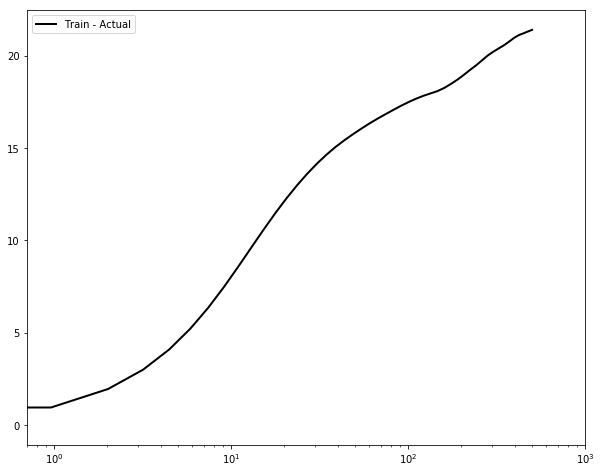

In [80]:
plot_data(test_550)

In [17]:
train_1000 = "./1000/new_scene_00.csv"
train_1000_frame = pd.read_csv(train_1000)
train_1000_frame['viscosity'] = 5.3566e-5

In [6]:
test_mod_d_1 = pd.read_csv("./Experiments/exp_1/test_data/test_2/test_2_10.0.csv")
test_mod_d_2 = pd.read_csv("./Experiments/exp_1/test_data/test_2/test_2_2.csv")
test_mod_v_1 = pd.read_csv("./Experiments/exp_1/test_data/test_3/test_3_1e-05.csv")
test_mod_v_2 = pd.read_csv("./Experiments/exp_1/test_data/test_3/test_3_10.0.csv")

In [673]:
train_mod_d_1 = pd.read_csv("./1000/test_file_10.csv")
train_mod_d_2 = pd.read_csv("./1000/test_file_2.csv")
train_mod_v_1 = pd.read_csv("./1000/test_file_visco_1e-05.csv")
train_mod_v_2 = pd.read_csv("./1000/test_file_visco_10.csv")

In [3]:

INST_VEL = ['VELOC:0','VELOC:1','VELOC:2']
AVG_VEL = ['AVVEL:0','AVVEL:1','AVVEL:2']
POSITIONS = ['Points:0', 'Points:1', 'Points:2', 'delta']
PRESSURE  = ['PRESS']
GRADIENTS = ['Gradients:0','Gradients:1','Gradients:2','Gradients:3',
             'Gradients:4','Gradients:5','Gradients:6','Gradients:7',
             'Gradients:8']
TO_PREDICT = ['u_plus']
REYNOLDS = ['viscosity','Local_Re','Local_Re_Avg','Local_Re_y',
        'Local_Re_log', 'Log_delta', 'y_delta']
OTHERS = ['wall_shear','u_tau','y_plus', 'TURBU']

#!!! URGENT
# Specify viscosity of flow. This is used if dataset does not contain viscosity
visco_180 = 3.547e-4
visco_1000 = 5.3566e-5

FLOW_VISCOSITY = visco_1000

#For tests
REQUIRED_COLUMNS = ['u_plus','u_tau','dim_veloc','dim_y','dim_delta','y_plus','VELOC:0','Local_u_tau','Local_u_plus',
                    'Local_Re_y','Points:1','Local_Re','delta','viscosity','Local_Re_log','u_plus_log','u_plus_sqrt']
#REQUIRED_COLUMNS = ['u_plus','u_tau','delta','y_plus','VELOC:0','Points:1']
# function to correct 0's when calculating logs
TO_DROP = ['y_plus','u_tau','Points:1','delta','dim_delta','dim_veloc','dim_y','Local_Re']
"""
def calc_log(x):
    if x == 0:
        return np.log(0.001)
    else:
        return np.log(x)
"""

def calc_log(x):
    result = np.log(x)
    if result in (np.inf, -np.inf, np.nan):
        return 0
    else:
        return result

# function to get height and velocity at first off wall grid point    
def get_off_wall_point(dataframe, height=1):
    grid_height = len(dataframe.groupby('Points:1'))
    plane = grid_height**2
    sorted_dataframe = dataframe.sort_values(["Points:1", "Points:2","Points:0"])
    offWall_height = float(np.unique(sorted_dataframe.iloc[plane*height:plane*(height+1)]["Points:1"]))
    offWall_velocity = np.mean(sorted_dataframe.iloc[plane*height:plane*(height+1)]["VELOC:0"])
    return offWall_height, offWall_velocity
    

# Function to prepare dataframe and return clean dataframe ready for model
def clean_dataframe(dataframe, min_vars = True, off_wall_height=1):
    data=dataframe.copy()
    off_h, off_vel = get_off_wall_point(data, height=off_wall_height)
    off_h, off_vel = get_off_wall_point(data, height=off_wall_height)
    #if "viscosity" not in data.columns:
        #data['viscosity'] = FLOW_VISCOSITY
    assert "viscosity" in data.columns, "viscosity not found in dataframe"
    #data['delta_squared'] = data['delta']**2
    #data['delta'] = data.delta + 0.001
    data['Local_Re'] = data['VELOC:0'] * data['delta'] / data.viscosity
    data['dim_veloc'] = data["VELOC:0"] / off_vel
    #data['dim_veloc_1'] = data["VELOC:1"] / off_vel_1
    #data['dim_veloc_2'] = data["VELOC:2"] / off_vel_2
    data['dim_y'] = data["Points:1"] / off_h
    data['dim_delta'] = data['delta']/ off_h
    data['Local_u_tau'] = np.sqrt(abs(data.wall_shear))
    data['Local_u_plus'] = data['VELOC:0'] / data['Local_u_tau']
    #data['Local_Re'] = data.Local_Re + 0.001
    #data['Local_Re_Avg'] = data['AVVEL:0'] * data['delta'] / data.viscosity
    data['Local_Re_y'] = data['VELOC:0'] * data['Points:1'] / data.viscosity
    data['Local_Re_log'] = data.Local_Re.apply(calc_log)
    data['u_plus_log'] = data.u_plus.apply(calc_log)
    data['u_plus_sqrt'] = data.u_plus.apply(np.sqrt)
    #data['Log_delta'] = data.delta.apply(calc_log)
    #data['y_delta'] = data['Points:1'] / data.delta
    #data['pu_tau'] = np.sqrt(abs(data.wall_shear))
    if min_vars:
        data = data[REQUIRED_COLUMNS]
        msg = "Error in subsetting required columns"
        assert list(data.columns)== REQUIRED_COLUMNS, msg
    # just to drop delta. can be changed
    #data = data.drop(columns=['delta'])
    return data

    # Function to get inputs and response from clean-dataframe
# drop delta if not required as input
def X_Y_split(dataframe, drop=TO_DROP):
    return dataframe.drop(columns=TO_PREDICT + drop), dataframe[TO_PREDICT]
    #return dataframe.drop(columns=TO_PREDICT ), dataframe[TO_PREDICT]
    #return dataframe.drop(columns=TO_PREDICT + ['y_plus','u_plus']), dataframe[TO_PREDICT]
    
def X_Y_split_2(dataframe, x, y):
    return dataframe[x], dataframe[y]

In [7]:
test_550.groupby("Points:1").mean()

,VELOC:0,VELOC:1,VELOC:2,AVVEL:0,AVVEL:1,AVVEL:2,Gradients:0,Gradients:1,Gradients:2,Gradients:3,...,Gradients:7,Gradients:8,Points:0,Points:2,viscosity,wall_shear,delta,u_tau,u_plus,y_plus
Points:1,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.592802,0.000000,0.000000e+00,...,-0.109900,0.000000,3.0,1.5,0.000089,0.002468,0.000000,0.047324,0.000000,0.000000
0.001819,0.050179,-0.000157,-0.000200,0.048948,-0.000156,-0.000039,0.000174,26.393357,-0.000358,-2.131651e-06,...,-0.098227,0.000661,3.0,1.5,0.000089,0.002361,0.001819,0.047324,0.959791,0.962173
0.003822,0.100651,-0.000258,-0.000373,0.098208,-0.000239,-0.000086,0.000317,24.141245,-0.000357,-1.106476e-05,...,-0.081361,0.001041,3.0,1.5,0.000089,0.002159,0.003822,0.047324,1.960739,2.022104
0.006028,0.151595,-0.000347,-0.000541,0.148148,-0.000333,-0.000137,0.000515,22.204876,0.000188,-1.811652e-05,...,-0.077072,0.001182,3.0,1.5,0.000089,0.001986,0.006028,0.047324,3.007156,3.189498
0.008458,0.203397,-0.000423,-0.000731,0.199131,-0.000393,-0.000191,0.000655,20.482293,0.001208,-2.377882e-05,...,-0.078691,0.001112,3.0,1.5,0.000089,0.001832,0.008458,0.047324,4.097144,4.474974
0.011133,0.255938,-0.000482,-0.000943,0.250964,-0.000453,-0.000247,0.000644,18.759955,0.002285,-3.115269e-05,...,-0.078298,0.000881,3.0,1.5,0.000089,0.001678,0.011133,0.047324,5.221722,5.890143
0.014077,0.308564,-0.000529,-0.001170,0.303016,-0.000490,-0.000302,0.000447,16.906612,0.003180,-4.179720e-05,...,-0.073106,0.000566,3.0,1.5,0.000089,0.001512,0.014077,0.047324,6.364552,7.447685
0.017316,0.360184,-0.000564,-0.001394,0.354211,-0.000521,-0.000354,0.000085,14.888994,0.003765,-5.073173e-05,...,-0.060473,0.000240,3.0,1.5,0.000089,0.001332,0.017316,0.047324,7.502548,9.161433
0.020878,0.409498,-0.000588,-0.001579,0.403267,-0.000539,-0.000398,-0.000328,12.768022,0.003943,-4.873853e-05,...,-0.037661,-0.000052,3.0,1.5,0.000089,0.001142,0.020878,0.047324,8.608683,11.046462


In [20]:
train_plane = 20
#clean_data_train = clean_dataframe(train_1000_frame, train_plane)
#clean_data_train_mod = clean_dataframe(train_mod, train_plane)
clean_data_test = clean_dataframe(test_frame, off_wall_height=20)
clean_test_mod_d_1 = clean_dataframe(test_mod_d_1, off_wall_height=1)
clean_test_mod_d_2 = clean_dataframe(test_mod_d_2, off_wall_height=1)
clean_test_mod_v_1 = clean_dataframe(test_mod_v_1, off_wall_height=1)
clean_test_mod_v_2 = clean_dataframe(test_mod_v_2, off_wall_height=1)

NameError: name 'test_mod_d_1' is not defined

In [10]:
clean_test_550 = clean_dataframe(test_550, off_wall_height=2)

In [11]:
clean_test_550.to_csv("./finals_results/clean_550_yp20.csv",index=False,header=True)

In [674]:
clean_train_mod_d_1 = clean_dataframe(train_mod_d_1, off_wall_height=1)
clean_train_mod_d_2 = clean_dataframe(train_mod_d_2, off_wall_height=1)
clean_train_mod_v_1 = clean_dataframe(train_mod_v_1, off_wall_height=1)
clean_train_mod_v_2 = clean_dataframe(train_mod_v_2, off_wall_height=1)

In [12]:
def model_data(data_train, data_test, inputs, output="u_plus"):    
    train_data, validation_data = train_test_split(data_train, test_size=0.3,random_state=50)
    train_x, train_y = X_Y_split_2(train_data,inputs, output)
    test_x, test_y = X_Y_split_2(data_test, inputs, output)
    validation_x, validation_y = X_Y_split_2(validation_data, inputs, output)
    dtrain = xgb.DMatrix(data=train_x, label=train_y, feature_names=train_x.columns)
    dvalidation = xgb.DMatrix(data=validation_x, label=validation_y, feature_names=validation_x.columns)
    dtest = xgb.DMatrix(data=test_x, label=test_y, feature_names=test_x.columns)
    eval_matrix = [(dtrain,"train"),(dvalidation,"validation"),(dtest,"test")]
    eval_set = [(train_x, train_y),(validation_x, validation_y),(test_x, test_y)]
    return dtrain, dvalidation, dtest, eval_matrix, (train_data, validation_data)

def model_data_2(data_train, data_test, inputs, output="u_plus"):    
    train_data, validation_data = train_test_split(data_train, test_size=0.3,random_state=50)
    train_x, train_y = X_Y_split_2(train_data,inputs, output)
    real_test, validation_test = train_test_split(data_test, test_size=0.1,random_state=50)
    
    real_test_x, real_test_y = X_Y_split_2(real_test, inputs, output)
    val_test_x, val_test_y = X_Y_split_2(validation_test, inputs, output)
    validation_x, validation_y = X_Y_split_2(validation_data, inputs, output)
    dtrain = xgb.DMatrix(data=train_x, label=train_y, feature_names=train_x.columns)
    dvalidation = xgb.DMatrix(data=validation_x, label=validation_y, feature_names=validation_x.columns)
    dtest_real = xgb.DMatrix(data=real_test_x, label=real_test_y, feature_names=real_test_x.columns)
    dtest_val = xgb.DMatrix(data=val_test_x, label=val_test_y, feature_names=val_test_x.columns)
    eval_matrix = [(dtrain,"train"),(dvalidation,"validation"),(dtest_val,"test")]
    #eval_set = [(train_x, train_y),(validation_x, validation_y),(test_x, test_y)]
    return dtrain, dvalidation, dtest_val, eval_matrix, dtest_real, real_test


def model_test_data(data_test, inputs, output="u_plus"):
    test_x, test_y = X_Y_split_2(data_test, inputs, output)
    dtest = xgb.DMatrix(data=test_x, label=test_y, feature_names=test_x.columns)
    return dtest, data_test

In [13]:
def process_testfile(test_dataframe, test_matrix, model, use_last=False , log=False, sqrt=False):
    
    if use_last:
        prediction = model.predict(test_matrix)
    else:
        prediction = model.predict(test_matrix, ntree_limit=model.best_ntree_limit)
    pred_frame = test_dataframe[['y_plus','delta','Points:1','u_tau','u_plus','VELOC:0','viscosity','u_plus_log','u_plus_sqrt']].copy()
    pred_frame['prediction'] = prediction
    if log:
        pred_frame['pred_u_plus'] = np.exp(pred_frame.prediction)
    elif sqrt:
        pred_frame['pred_u_plus'] = pred_frame.prediction ** 2
    else:
        pred_frame['pred_u_plus'] = pred_frame.prediction
    pred_frame['pred_u_tau'] = pred_frame['VELOC:0'] / pred_frame.pred_u_plus
    pred_frame['calc_y_plus'] = pred_frame['delta'] * pred_frame.pred_u_tau / pred_frame.viscosity
    #print(f"U_tau - actual: {np.mean(pred_frame.groupby('Points:1').mean().u_tau)}")
    #print(f"U_tau - predicted: {np.mean(pred_frame.groupby('Points:1').mean().pred_u_tau)}")
    print(f"R2 score : {r2_score(pred_frame.u_plus, pred_frame.pred_u_plus)}")
    print(f"RMSE score : {np.sqrt(mean_squared_error(pred_frame.u_plus, pred_frame.pred_u_plus))}")
    return pred_frame

In [14]:
#train_grid = 64
#test_grid = 32

def plot_test(predictions_file, train_grid=64, test_grid=32):
    plt.figure(figsize=(10,8))
    #means_test= predictions_file.groupby("Points:1").aggregate(np.mean)
    means_train = train_1000_frame.groupby("Points:1").aggregate(np.mean)
    means_pred= predictions_file.groupby("Points:1").aggregate(np.mean)

    plt.plot(means_train['y_plus'].iloc[:train_grid],means_train['u_plus'].iloc[:train_grid],label="Train - Actual",linewidth=2, color="black")
    plt.plot(means_pred['y_plus'].iloc[:test_grid],means_pred['u_plus'].iloc[:test_grid],label="Test - Actual", color="green",
            linewidth=3, linestyle="--")
    plt.scatter(means_pred['calc_y_plus'].iloc[:test_grid],means_pred['pred_u_plus'].iloc[:test_grid], marker="s",color="red", linewidths=1, 
                label="Test - Predictions_calc_yplus")
    #plt.scatter(means_pred['y_plus'].iloc[:test_grid],means_pred['pred_u_plus'].iloc[:test_grid], marker="+",color="blue", linewidths=1, 
                #label="Test - Predictions")
    plt.xscale("log")
    plt.xticks((1,10,100,1000))
    plt.legend()
    
    
def plot_data(dataframe):
    grid = int(np.cbrt(len(dataframe)) // 2)
    plt.figure(figsize=(10,8))
    means_train = dataframe.groupby("Points:1").aggregate(np.mean)
    plt.plot(means_train['y_plus'].iloc[:grid],means_train['u_plus'].iloc[:grid],label="Train - Actual",linewidth=2, color="black")
    plt.xscale("log")
    plt.xticks((1,10,100,1000))
    plt.legend()

In [15]:

def plot_predictions(pred_list, title = "Test", test_grid=32, train_frame = None, plot_train=False, train_grid=64, scaled=False):
    if test_grid == 32:
        test_name = r"$Re_{\tau} = 180$"
        train_name = r"$Re_{\tau} = 1000$"
    elif test_grid == 64:
        test_name = r"$Re_{\tau} = 1000$"
        train_name = r"$Re_{\tau} = 180$"
    
    if scaled:
        test_name = scaled
    means_test     = pred_list[0].groupby("Points:1").aggregate(np.mean)
    means_v_y_mod  = pred_list[1].groupby("Points:1").aggregate(np.mean)
    means_loc_mod  = pred_list[2].groupby("Points:1").aggregate(np.mean)
    means_dim_mod  = pred_list[3].groupby("Points:1").aggregate(np.mean)
    
    plt.rcParams["axes.linewidth"]  = 1.5
    fig, ax = plt.subplots(figsize=(15,10))
    
    if plot_train and train_frame is not None :
        means_train = train_frame.groupby("Points:1").aggregate(np.mean)
        plt.plot(means_train['y_plus'].iloc[:train_grid],means_train['u_plus'].iloc[:train_grid],label=f"Train - ({train_name})",linewidth=2, color="black", linestyle="--")
    plt.plot(means_test['y_plus'].iloc[:test_grid],means_test['u_plus'].iloc[:test_grid],label=f"LES - ({test_name}) ",linewidth=2, color="black")
    plt.plot(means_v_y_mod['calc_y_plus'].iloc[:test_grid],means_v_y_mod['pred_u_plus'].iloc[:test_grid], marker="x",color="red", fillstyle="none", 
                linestyle=" ",label="XGB 1 (Primitive flow variables)")
    plt.plot(means_loc_mod['calc_y_plus'].iloc[:test_grid],means_loc_mod['pred_u_plus'].iloc[:test_grid],label="XGB 2 (Physics-informed variables)", color="green",linestyle=" ",
             fillstyle="none",marker="v")
    plt.plot(means_dim_mod['calc_y_plus'].iloc[:test_grid],means_dim_mod['pred_u_plus'].iloc[:test_grid], marker="o",color="blue", linestyle=" ", 
                fillstyle="none", label="XGB 3 (Dimensionless variables)")
    
    plt.xscale("log")
    plt.xticks((1,10,100), fontsize=15,fontweight="heavy")
    plt.yticks(fontweight="heavy")
    plt.xlabel(r"$y^+$", fontsize=18, fontweight="heavy")
    plt.ylabel(r"$U^+$", fontsize=18, fontweight="heavy")
    plt.legend(frameon=False, labelspacing=1, fontsize=15)
    ax.tick_params(direction="in",right=True, top=True, labelsize=15, which="major",width=1.5,length=5)
    ax.tick_params(direction="in",right=True, top=True, which="minor",width=1.2,length=3)
    #plt.xlim(np.min(means_test.u_plus),200)
    plt.xlim(0.5,200)
    ax.set_title(title,pad=10, fontsize=20)
    plt.show()

In [67]:
#velocity and delta data
v_d_train, v_d_validation, v_d_test, v_d_eval = model_data(clean_data_train, clean_data_test,
                                                           ["VELOC:0","VELOC:1","VELOC:2","Points:1"], 
                                                           ["u_plus"])




In [61]:
default_params = dict(max_depth=5,
                      colsample_bytree=1,
                      subsample = 0.8,
                      learning_rate=0.01,
                      objective="reg:squarederror",
                      #objective="reg:squaredlogerror",
                      n_estimators =1000,
                      silent=0,
                      #eval_metric="rmsle",
                      reg_alpha=0,
                      reg_lambda=0,
                      gamma=0,
                      booster='gbtree',)

## VELOCITY AND DELTA ONLY

In [32]:
evals_result={}
model_v_d = xgb.train(params =default_params, dtrain=v_d_train,
                  num_boost_round=1000, early_stopping_rounds=9, evals=v_d_eval, verbose_eval=10,)

[0]	train-rmse:16.9356	validation-rmse:16.9431	test-rmse:13.6956
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 9 rounds.
[10]	train-rmse:15.3932	validation-rmse:15.3998	test-rmse:12.0305
[20]	train-rmse:14.0049	validation-rmse:14.0107	test-rmse:10.5362
[30]	train-rmse:12.7566	validation-rmse:12.7615	test-rmse:9.19471
[40]	train-rmse:11.6352	validation-rmse:11.6394	test-rmse:8.0051
[50]	train-rmse:10.629	validation-rmse:10.6329	test-rmse:6.94283
[60]	train-rmse:9.72821	validation-rmse:9.73137	test-rmse:6.01058
[70]	train-rmse:8.92327	validation-rmse:8.92558	test-rmse:5.20326
[80]	train-rmse:8.20559	validation-rmse:8.20701	test-rmse:4.52003
[90]	train-rmse:7.56723	validation-rmse:7.56825	test-rmse:3.95641
[100]	train-rmse:7.0014	validation-rmse:7.00173	test-rmse:3.51837
[110]	train-rmse:6.50146	validation-rmse:6.50074	test-rmse:3.2059
[120]	train-rmse:6.06126	validation-rmse:6.0601	test-rmse:3.01036
[13

R2 score : 0.7850507902197518


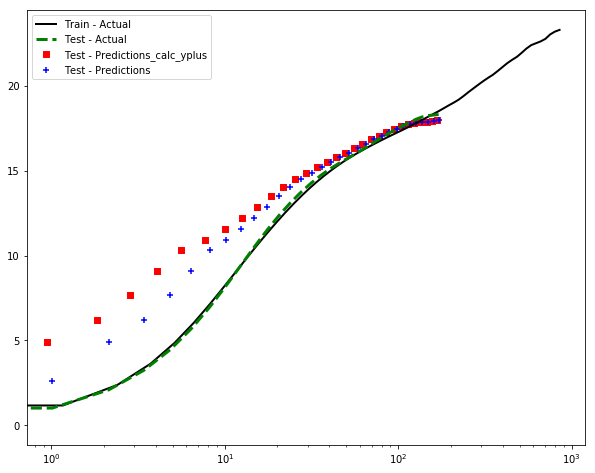

In [60]:
v_d_preds = process_testfile(clean_data_test,v_d_test,model_v_d)
plot_test(v_d_preds, train_grid=64, test_grid=32)

In [34]:
v_d_preds

,y_plus,delta,Points:1,u_tau,u_plus,VELOC:0,viscosity,pred_u_plus,calc_y_plus
0,0.000000,0.000000,0.000000,0.051059,0.000000,0.000000,0.000355,0.748470,0.000000
1,0.799828,0.005556,0.005556,0.051059,0.799828,0.040839,0.000355,2.492288,0.256682
2,1.695820,0.011781,0.011781,0.051059,1.693160,0.086451,0.000355,4.681044,0.613388
3,2.698822,0.018748,0.018748,0.051059,2.729391,0.139361,0.000355,5.909768,1.246435
4,3.820720,0.026542,0.026542,0.051059,3.926415,0.200480,0.000355,6.889459,2.177491
5,5.074491,0.035252,0.035252,0.051059,5.222560,0.266660,0.000355,8.242692,3.215191
6,6.474239,0.044975,0.044975,0.051059,6.505827,0.332182,0.000355,9.745907,4.321843
7,8.035223,0.055819,0.055819,0.051059,7.675036,0.391881,0.000355,10.197183,6.047810
8,9.773858,0.067897,0.067897,0.051059,8.691538,0.443783,0.000355,10.388336,8.177427
9,11.707691,0.081331,0.081331,0.051059,9.584407,0.489372,0.000355,10.533989,10.652306


## VELOCITY AND Y ONLY

In [1891]:
# velocity and y data
v_y_inputs = ["VELOC:0","Points:1"]
v_y_output = "u_plus"

v_y_train, v_y_val, v_y_test_val, v_y_eval, v_y_test, real_v_y_test = model_data_2(clean_data_train,
                                                    clean_data_test,
                                                    v_y_inputs, 
                                                    v_y_output)
v_y_d1_test = model_test_data(clean_test_mod_d_1,
                         v_y_inputs,
                         v_y_output)
v_y_d2_test = model_test_data(clean_test_mod_d_2,
                         v_y_inputs,
                         v_y_output)
v_y_v1_test = model_test_data(clean_test_mod_v_1,
                         v_y_inputs,
                         v_y_output)
v_y_v2_test = model_test_data(clean_test_mod_v_2,
                         v_y_inputs,
                         v_y_output)

#vy_train, vy_val = v_y_eval_set

/usr/local/lib/python3.7/site-packages/xgboost-0.90-py3.7.egg/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost-0.90-py3.7.egg/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [675]:
v_y_d1_train = model_test_data(clean_train_mod_d_1,
                         v_y_inputs,
                         ["u_plus"])
v_y_d2_train = model_test_data(clean_train_mod_d_2,
                         v_y_inputs,
                         ["u_plus"])
v_y_v1_train = model_test_data(clean_train_mod_v_1,
                         v_y_inputs,
                         ["u_plus"])
v_y_v2_train = model_test_data(clean_train_mod_v_2,
                         v_y_inputs,
                         ["u_plus"])

In [62]:
                                                   
dim_1_train_mod, dim_1_val_mod, dim_1_test_mod, dim_1_eval_mod = model_data(clean_data_train,
                                                                    clean_test_mod,
                                                                            ["VELOC:0",'Points:1'], 
                                                                            ["u_plus"])

In [1892]:
v_y_params = dict(max_depth=3,
                      colsample_bytree=1,
                      colsample_bylevel=1,
                      subsample = 1,
                      learning_rate=0.01,
                      objective="reg:squarederror",
                      #objective="reg:squaredlogerror",
                      n_estimators =1000,
                      silent=0,
                      #eval_metric="rmsle",
                      reg_alpha=0,
                      reg_lambda=0,
                      gamma=0,
                      booster='gbtree',)
v_y_evals_results = {}
model_v_y = xgb.train(params = v_y_params, dtrain=v_y_train,
                  num_boost_round=1000, early_stopping_rounds=20, evals=v_y_eval,evals_result=v_y_evals_results, verbose_eval=10)

[0]	train-rmse:16.9356	validation-rmse:16.9431	test-rmse:13.7066
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 20 rounds.
[10]	train-rmse:15.3937	validation-rmse:15.4002	test-rmse:12.06
[20]	train-rmse:14.0063	validation-rmse:14.0118	test-rmse:10.58
[30]	train-rmse:12.7593	validation-rmse:12.764	test-rmse:9.2478
[40]	train-rmse:11.6395	validation-rmse:11.6439	test-rmse:8.05846
[50]	train-rmse:10.636	validation-rmse:10.6396	test-rmse:6.99988
[60]	train-rmse:9.73808	validation-rmse:9.74108	test-rmse:6.06761
[70]	train-rmse:8.93634	validation-rmse:8.93865	test-rmse:5.24994
[80]	train-rmse:8.2219	validation-rmse:8.22344	test-rmse:4.54189
[90]	train-rmse:7.58701	validation-rmse:7.58777	test-rmse:3.94596
[100]	train-rmse:7.02429	validation-rmse:7.0244	test-rmse:3.46298
[110]	train-rmse:6.52721	validation-rmse:6.52676	test-rmse:3.09656
[120]	train-rmse:6.08975	validation-rmse:6.08889	test-rmse:2.8488
[130]	t

R2 score : 0.8243062837116615
RMSE score : 2.670015117220632


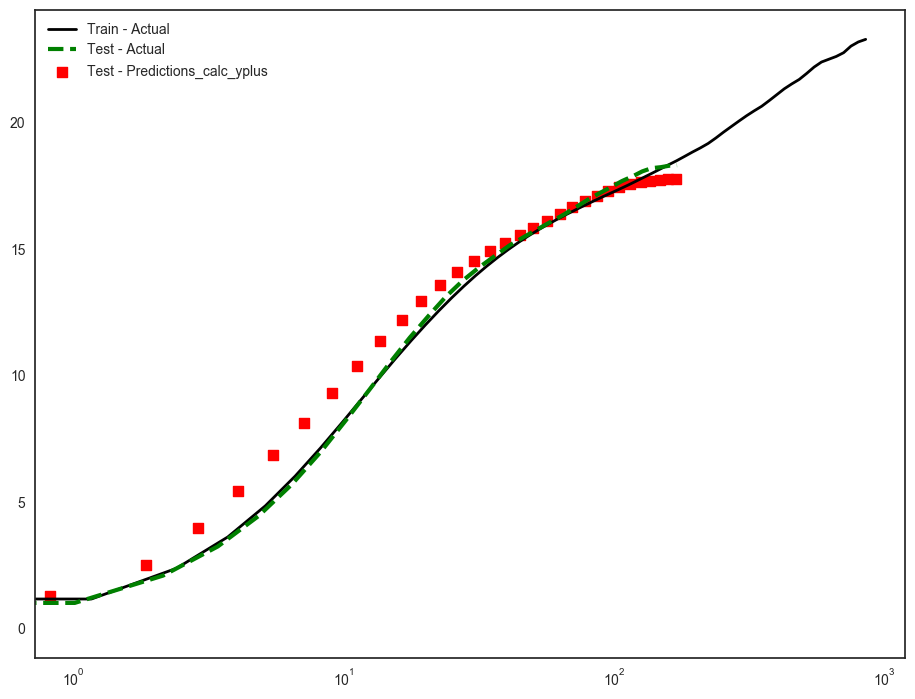

In [2506]:
v_y_preds = process_testfile(real_v_y_test,v_y_test,model_v_y)
plot_test(v_y_preds, train_grid=64, test_grid=32)

In [2514]:
v_y_preds = process_testfile(real_v_y_test,v_y_test,model_v_y)
v_y_preds_d_1 = process_testfile(clean_test_mod_d_1,v_y_d1_test,model_v_y)
v_y_preds_d_2 = process_testfile(clean_test_mod_d_2,v_y_d2_test,model_v_y)
v_y_preds_v_1 = process_testfile(clean_test_mod_v_1,v_y_v1_test,model_v_y)
v_y_preds_v_2 = process_testfile(clean_test_mod_v_2,v_y_v2_test,model_v_y)

R2 score : 0.8243062837116615
RMSE score : 2.670015117220632
R2 score : -3.032148875156765
RMSE score : 12.784518474064441
R2 score : -0.2906480570722654
RMSE score : 7.23302575746306
R2 score : -3.5514244440818317
RMSE score : 13.582814340664536
R2 score : -0.41140253556800777
RMSE score : 7.563826220455635


In [676]:
train_v_y_preds_d_1 = process_testfile(clean_train_mod_d_1,v_y_d1_train,model_v_y)
train_v_y_preds_d_2 = process_testfile(clean_train_mod_d_2,v_y_d2_train,model_v_y)
train_v_y_preds_v_1 = process_testfile(clean_train_mod_v_1,v_y_v1_train,model_v_y)
train_v_y_preds_v_2 = process_testfile(clean_train_mod_v_2,v_y_v2_train,model_v_y)

R2 score : -4.605071937002183
RMSE score : 16.121731810726104
R2 score : -1.8088815581818496
RMSE score : 11.412684466676104
R2 score : -3.585493551083525
RMSE score : 14.581900831586577
R2 score : -0.007531799031714526
RMSE score : 6.835188214219865


R2 score : -0.539025898022852
RMSE score : 7.8983988301976895


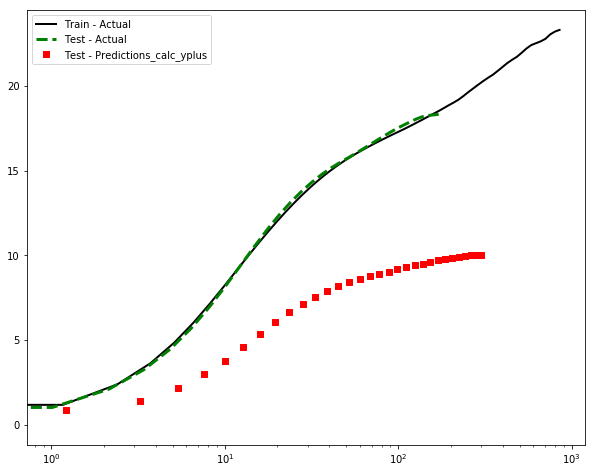

In [253]:
v_y_preds_mod = process_testfile(clean_test_mod_d_2,v_y_d2_test,model_v_y)
plot_test(v_y_preds_mod, train_grid=64, test_grid=32)

## INCLUDE LOCAL RE

In [12]:
#include Local_Re data
loc_inputs = ["VELOC:0","Local_Re","Local_Re_log","delta","Local_u_plus","Points:1"]
loc_output = 'u_plus'
#dim_train, dim_val, dim_test_val, dim_eval, dim_test, real_test_frame= model_data_2
loc_train, loc_val, loc_test_val, loc_eval, loc_test, loc_real_test = model_data_2(clean_data_train,
                                            clean_data_test,
                                            loc_inputs, 
                                            loc_output)
                                                   
loc_d1_test = model_test_data(clean_test_mod_d_1,
                         loc_inputs,
                         loc_output)

loc_d2_test = model_test_data(clean_test_mod_d_2,
                         loc_inputs,
                         loc_output)
loc_v1_test = model_test_data(clean_test_mod_v_1,
                         loc_inputs,
                         loc_output)
loc_v2_test = model_test_data(clean_test_mod_v_2,
                         loc_inputs,
                         loc_output)

/usr/local/lib/python3.7/site-packages/xgboost-0.90-py3.7.egg/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost-0.90-py3.7.egg/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [88]:
dtest_550, loc_550_test = model_test_data(clean_test_550, loc_inputs, loc_output)
loc_550_test

,u_plus,u_tau,dim_veloc,dim_y,dim_delta,y_plus,VELOC:0,Local_u_tau,Local_u_plus,Local_Re_y,Points:1,Local_Re,delta,viscosity,Local_Re_log,u_plus_log,u_plus_sqrt
0,0.000000,0.176037,0.000000,0.000000,0.000000,0.000000,0.000000,0.176037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000089,0.000000,0.000000,0.000000
1,3.579097,0.176037,12.556038,1.000000,1.000000,3.579097,0.630053,0.160683,3.921084,12.809933,0.001819,12.809933,0.001819,0.000089,2.550221,1.275110,1.891850
2,6.206312,0.176037,21.772726,2.101601,2.101601,7.521832,1.092539,0.121337,9.004187,46.682840,0.003822,46.682840,0.003822,0.000089,3.843377,1.825567,2.491247
3,7.438888,0.176037,26.096798,3.314889,3.314889,11.864308,1.309518,0.068615,19.084965,88.257265,0.006028,88.257265,0.006028,0.000089,4.480256,2.006721,2.727433
4,7.534576,0.176037,26.432485,4.650902,4.650902,16.646028,1.326362,0.019345,68.564678,125.420760,0.008458,125.420760,0.008458,0.000089,4.831674,2.019503,2.744918
5,7.302096,0.176037,25.616910,6.121706,6.121706,21.910179,1.285437,0.040180,31.992156,159.990239,0.011133,159.990239,0.011133,0.000089,5.075113,1.988161,2.702239
6,6.954297,0.176037,24.396774,7.740481,7.740481,27.703930,1.224212,0.042494,28.808967,192.661349,0.014077,192.661349,0.014077,0.000089,5.260934,1.939360,2.637100
7,6.594047,0.176037,23.132960,9.521603,9.521603,34.078738,1.160794,0.039088,29.696955,224.716795,0.017316,224.716795,0.017316,0.000089,5.414841,1.886167,2.567888
8,6.298872,0.176037,22.097440,11.480739,11.480739,41.090675,1.108833,0.032819,33.785834,258.824892,0.020878,258.824892,0.020878,0.000089,5.556152,1.840371,2.509755
9,6.087460,0.176037,21.355775,13.634935,13.634935,48.800751,1.071617,0.026457,40.504270,297.072637,0.024796,297.072637,0.024796,0.000089,5.693977,1.806231,2.467278


In [677]:
loc_d1_train = model_test_data(clean_train_mod_d_1,
                         loc_inputs,
                         ["u_plus"])
loc_d2_train = model_test_data(clean_train_mod_d_2,
                         loc_inputs,
                         ["u_plus"])
loc_v1_train = model_test_data(clean_train_mod_v_1,
                         loc_inputs,
                         ["u_plus"])
loc_v2_train = model_test_data(clean_train_mod_v_2,
                         loc_inputs,
                         ["u_plus"])

In [13]:
loc_params = dict(max_depth=4,
                      colsample_bytree=0.5,
                      subsample = 0.8,
                      learning_rate=0.01,
                      objective="reg:squarederror",
                      #objective="reg:squaredlogerror",
                      n_estimators =1000,
                      silent=0,
                      eval_metric="rmse",
                      reg_alpha=0,
                      reg_lambda=0,
                      gamma=0,
                      booster='gbtree',)

loc__eval_results = {}
model_loc = xgb.train(params =loc_params, dtrain=loc_train,
                  num_boost_round=1000, early_stopping_rounds=20, evals=loc_eval, evals_result=loc__eval_results, verbose_eval=10)

[0]	train-rmse:16.9356	validation-rmse:16.9431	test-rmse:13.7491
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 20 rounds.
[10]	train-rmse:15.391	validation-rmse:15.3976	test-rmse:12.3448
[20]	train-rmse:14.0017	validation-rmse:14.0075	test-rmse:11.0886
[30]	train-rmse:12.7513	validation-rmse:12.7563	test-rmse:9.93178
[40]	train-rmse:11.6279	validation-rmse:11.6321	test-rmse:8.8525
[50]	train-rmse:10.6195	validation-rmse:10.6231	test-rmse:7.82929
[60]	train-rmse:9.71893	validation-rmse:9.72176	test-rmse:6.93812
[70]	train-rmse:8.91466	validation-rmse:8.91676	test-rmse:6.19475
[80]	train-rmse:8.19707	validation-rmse:8.19852	test-rmse:5.52761
[90]	train-rmse:7.55814	validation-rmse:7.559	test-rmse:4.85637
[100]	train-rmse:6.9933	validation-rmse:6.99346	test-rmse:4.36345
[110]	train-rmse:6.4937	validation-rmse:6.4932	test-rmse:3.91159
[120]	train-rmse:6.05416	validation-rmse:6.05309	test-rmse:3.53172
[130

R2 score : 0.46143775738628345
RMSE score : 5.93407572949126


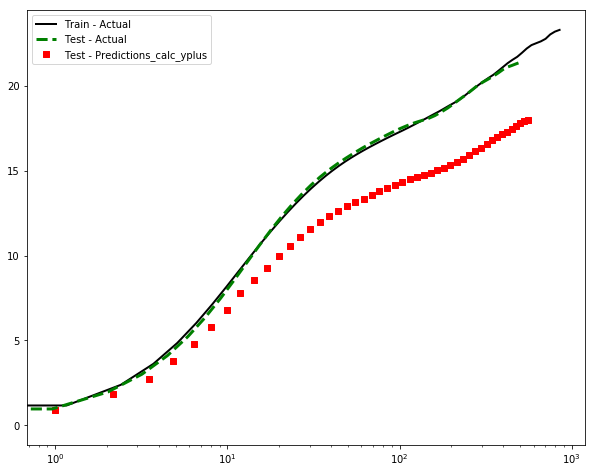

In [89]:
loc_preds = process_testfile(loc_550_test,dtest_550, model_loc)
plot_test(loc_preds, train_grid=64, test_grid=48)

In [1459]:
r2_score(loc_preds.groupby("Points:1").mean().u_plus, loc_preds.groupby("Points:1").mean().pred_u_plus, multioutput="raw_values")

array([0.99933006])

In [2513]:
loc_preds = process_testfile(loc_real_test,loc_test,model_loc)
loc_preds_d_1 = process_testfile(clean_test_mod_d_1,loc_d1_test,model_loc)
loc_preds_d_2 = process_testfile(clean_test_mod_d_2,loc_d2_test,model_loc)
loc_preds_v_1 = process_testfile(clean_test_mod_v_1,loc_v1_test,model_loc)
loc_preds_v_2 = process_testfile(clean_test_mod_v_2,loc_v2_test,model_loc)

R2 score : 0.8432177007023806
RMSE score : 2.5222267092306687
R2 score : 0.45363616558656594
RMSE score : 4.706055751142618
R2 score : 0.5667299054632509
RMSE score : 4.190785693365352
R2 score : 0.36301368512696075
RMSE score : 5.081373831299333
R2 score : 0.6042737898380269
RMSE score : 4.005101286749591


In [719]:
train_loc_preds_d_1 = process_testfile(clean_train_mod_d_1,loc_d1_train,model_loc)
train_loc_preds_d_2 = process_testfile(clean_train_mod_d_2,loc_d2_train,model_loc)
train_loc_preds_v_1 = process_testfile(clean_train_mod_v_1,loc_v1_train,model_loc)
train_loc_preds_v_2 = process_testfile(clean_train_mod_v_2,loc_v2_train,model_loc)

R2 score : 0.21422401853972417
RMSE score : 6.036295218148084
R2 score : 0.2758158654885704
RMSE score : 5.79489538240204
R2 score : 0.2049370048311363
RMSE score : 6.071861645430934
R2 score : 0.5601912190267682
RMSE score : 4.515990762061396


In [1312]:

plt.style.use('seaborn-pastel')

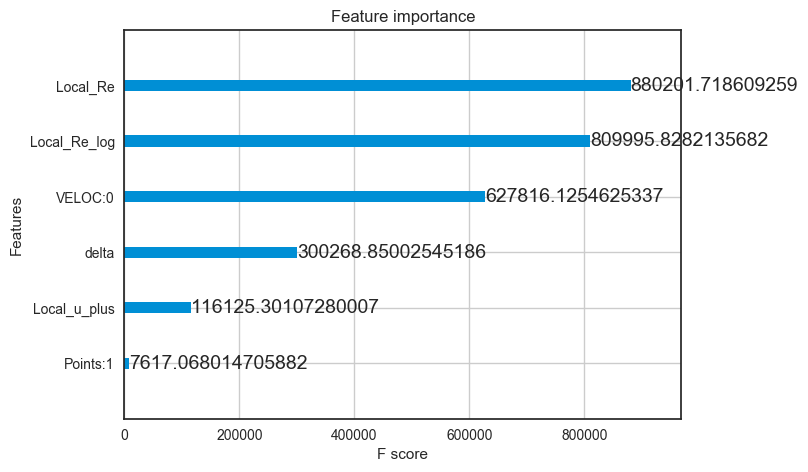

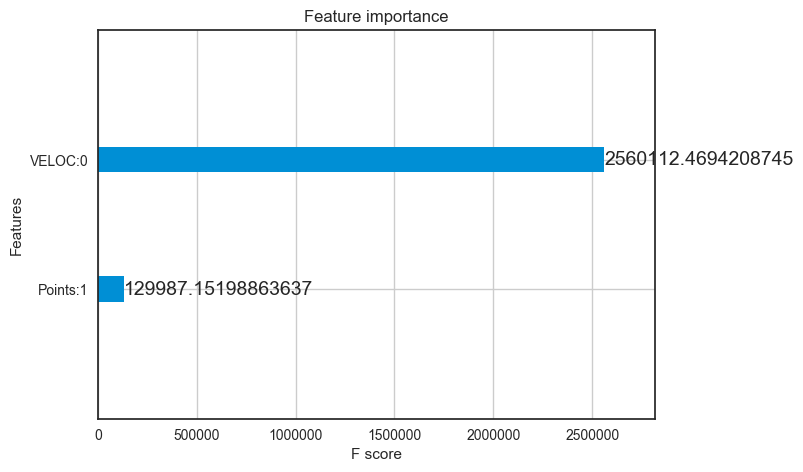

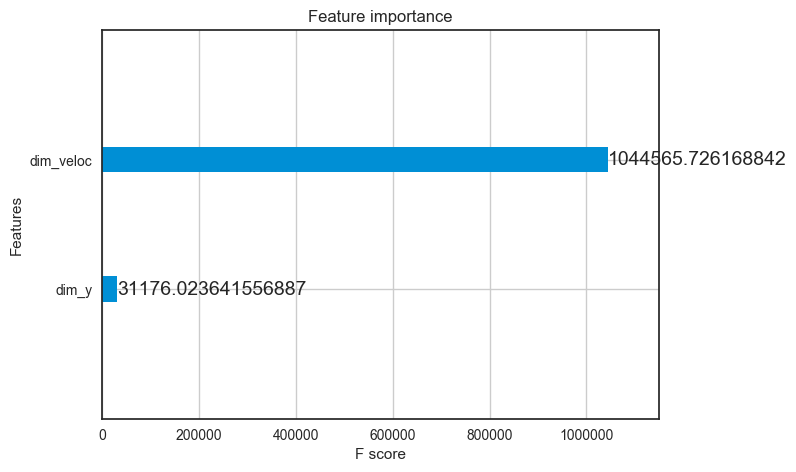

In [2440]:
from xgboost import plot_importance
plot_importance(model_loc,importance_type="gain", height=0.2)

## DIMENSIONLESS

In [91]:
# dimensionless data
dim_train, dim_val, dim_test, dim_eval, _ = model_data(clean_data_train,
                                                    clean_data_test,
                                                    ["dim_veloc",'dim_y','Local_Re'], 
                                                    ["u_plus"])

dim_train_1, dim_val_1, dim_test_1, dim_eval_1,_ = model_data(clean_data_train,
                                                    clean_data_test,
                                                    ["dim_veloc",'dim_delta'], 
                                                    ["u_plus"])
dim_train_2, dim_val_2, dim_test_2, dim_eval_2,_ = model_data(clean_data_train,
                                                    clean_data_test,
                                                    ["dim_veloc",'dim_y','dim_delta'], 
                                                    ["u_plus"])

In [139]:
#include Local_Re data
#dim_inputs = ["dim_veloc",'dim_y','dim_delta','Local_Re']
dim_inputs = ["dim_veloc",'dim_y']
dim_output = "u_plus"

dim_train, dim_val, dim_test_val, dim_eval, dim_test, real_test_frame= model_data_2(clean_data_train,
                                            clean_data_test,
                                            dim_inputs, 
                                            dim_output)
                                                   
dim_d1_test,dim_d1_frame  = model_test_data(clean_test_mod_d_1.sample(frac=0.1),
                         dim_inputs,
                         dim_output)

dim_d2_test, dim_d2_frame = model_test_data(clean_test_mod_d_2.sample(frac=0.1),
                         dim_inputs,
                         dim_output)
dim_v1_test, dim_v1_frame = model_test_data(clean_test_mod_v_1.sample(frac=0.1),
                         dim_inputs,
                         dim_output)
dim_v2_test, dim_v2_frame = model_test_data(clean_test_mod_v_2.sample(frac=0.1),
                         dim_inputs,
                         dim_output)

In [680]:
dim_d1_train = model_test_data(clean_train_mod_d_1,
                         dim_inputs,
                         ["u_plus"])
dim_d2_train = model_test_data(clean_train_mod_d_2,
                         dim_inputs,
                         ["u_plus"])
dim_v1_train = model_test_data(clean_train_mod_v_1,
                         dim_inputs,
                         ["u_plus"])
dim_v2_train = model_test_data(clean_train_mod_v_2,
                         dim_inputs,
                         ["u_plus"])

In [109]:
# 550 data
dim_dtest_550, dim_550_test = model_test_data(clean_test_550, dim_inputs, dim_output)

### DIM - VELOC and DELTA

In [1878]:
dim_params = dict(max_depth=3,
                      colsample_bytree=1,
                      colsample_bylevel=1,
                      subsample = 0.8,
                      learning_rate=0.05,
                      objective="reg:squarederror",
                      n_estimators =1000,
                      silent=0,
                      #eval_metric="rmsle",
                      reg_alpha=0,
                      reg_lambda=0,
                      gamma=0,
                      booster='gbtree',)
model_dim = xgb.train(params =dim_params, dtrain=dim_train,
                  num_boost_round=1000, early_stopping_rounds=9, evals=dim_eval, verbose_eval=10)

[0]	train-rmse:16.2833	validation-rmse:16.2904	test-rmse:13.1085
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 9 rounds.
[10]	train-rmse:10.1623	validation-rmse:10.1655	test-rmse:7.32194
[20]	train-rmse:6.71014	validation-rmse:6.70983	test-rmse:4.15735
[30]	train-rmse:4.89643	validation-rmse:4.89395	test-rmse:2.81892
[40]	train-rmse:4.04172	validation-rmse:4.03719	test-rmse:2.60105
Stopping. Best iteration:
[39]	train-rmse:4.09894	validation-rmse:4.09461	test-rmse:2.59536



In [1879]:
dim_preds = process_testfile(clean_data_test,dim_test,model_dim)
plot_test(dim_preds, train_grid=64, test_grid=32)

ValueError: Length of values does not match length of index

### DIM - VELOC and Y

In [144]:
dim_params_1 = dict(max_depth=3,
                      colsample_bytree=1,
                    colsample_bylevel=1,
                      subsample = 0.8,
                      learning_rate=0.01,
                      objective="reg:squarederror",
                      n_estimators =1000,
                      silent=0,
                      #eval_metric="rmsle",
                      reg_alpha=0,
                      reg_lambda=0,
                      gamma=0,
                      booster='gbtree',)
dim_1_evals_results = {}
model_dim_1 = xgb.train(params =dim_params_1, dtrain=dim_train,
                  num_boost_round=1000, early_stopping_rounds=10, evals=dim_eval, evals_result=dim_1_evals_results, verbose_eval=20)

[0]	train-rmse:16.9356	validation-rmse:16.9431	test-rmse:13.7261
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 10 rounds.
[20]	train-rmse:14.0063	validation-rmse:14.0119	test-rmse:10.9524
[40]	train-rmse:11.6396	validation-rmse:11.644	test-rmse:8.71502
[60]	train-rmse:9.73816	validation-rmse:9.74116	test-rmse:6.92486
[80]	train-rmse:8.22185	validation-rmse:8.22347	test-rmse:5.51365
[100]	train-rmse:7.02432	validation-rmse:7.02443	test-rmse:4.43119
[120]	train-rmse:6.0897	validation-rmse:6.08886	test-rmse:3.64053
[140]	train-rmse:5.37177	validation-rmse:5.37006	test-rmse:3.10518
[160]	train-rmse:4.82973	validation-rmse:4.82719	test-rmse:2.78375
[180]	train-rmse:4.42854	validation-rmse:4.42507	test-rmse:2.63192
[200]	train-rmse:4.13667	validation-rmse:4.13243	test-rmse:2.59499
Stopping. Best iteration:
[198]	train-rmse:4.16173	validation-rmse:4.15756	test-rmse:2.59492



In [127]:
model_dim_1.save_model("./finals_results/models/model_dim_2.md")

In [143]:
joblib.dump(model_dim_1,"./finals_results/models/model_dim_1.md" )

['./finals_results/models/model_dim_1.md']

In [94]:
dim_preds_1 = process_testfile(real_test_frame,dim_test,model_dim_1)
dim_preds_d_1 = process_testfile(dim_d1_frame,dim_d1_test,model_dim_1)
dim_preds_d_2 = process_testfile(dim_d2_frame,dim_d2_test,model_dim_1)
dim_preds_v_1 = process_testfile(dim_v1_frame,dim_v1_test,model_dim_1)
dim_preds_v_2 = process_testfile(dim_v2_frame,dim_v2_test,model_dim_1)

R2 score : 0.8362671059331067
RMSE score : 2.5775290864717837
R2 score : 0.8354364314250203
RMSE score : 2.5679494623921997
R2 score : 0.834802183886326
RMSE score : 2.5831828073140364
R2 score : 0.837651198047807
RMSE score : 2.5618126542377997
R2 score : 0.8363844749682114
RMSE score : 2.579471175157523


R2 score : 0.5622700239642785
RMSE score : 5.349809002514955


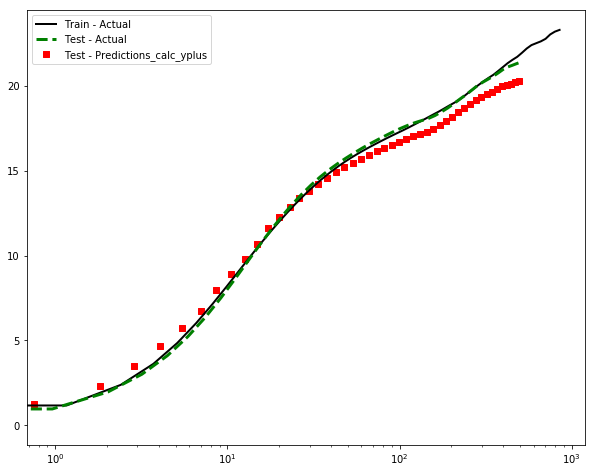

In [105]:
dim_pred_550 = process_testfile(dim_550_test, dim_dtest_550, model_dim_1)
plot_test(dim_pred_550, train_grid=64, test_grid=48)

In [1061]:
train_dim_preds_d_1 = process_testfile(clean_train_mod_d_1,dim_d1_train,model_dim_1, use_last=True)
train_dim_preds_d_2 = process_testfile(clean_train_mod_d_2,dim_d2_train,model_dim_1)
train_dim_preds_v_1 = process_testfile(clean_train_mod_v_1,dim_v1_train,model_dim_1)
train_dim_preds_v_2 = process_testfile(clean_train_mod_v_2,dim_v2_train,model_dim_1)

KeyError: "['u_plus_log' 'u_plus_sqrt'] not in index"

In [106]:
r2_score(dim_pred_550.groupby("Points:1").mean().u_plus, dim_pred_550.groupby("Points:1").mean().pred_u_plus)

0.9818477362375693

R2 score : 0.8338942792724616
RMSE score : 2.596138756892279


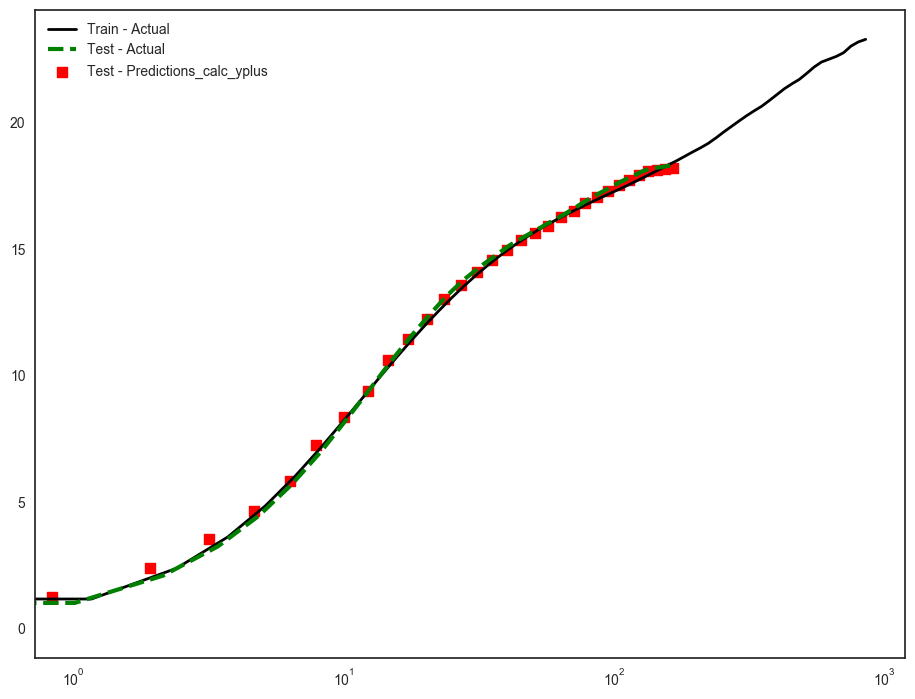

In [2500]:
dim_preds_1 = process_testfile(real_test_frame,dim_test,model_dim_1)
plot_test(dim_preds_1, train_grid=64, test_grid=32)

In [1082]:
mean_squared_error(dim_preds_1.u_tau, dim_preds_1.pred_u_tau)
#np.mean(dim_preds_1.pred_u_tau)

0.0002664196923666855

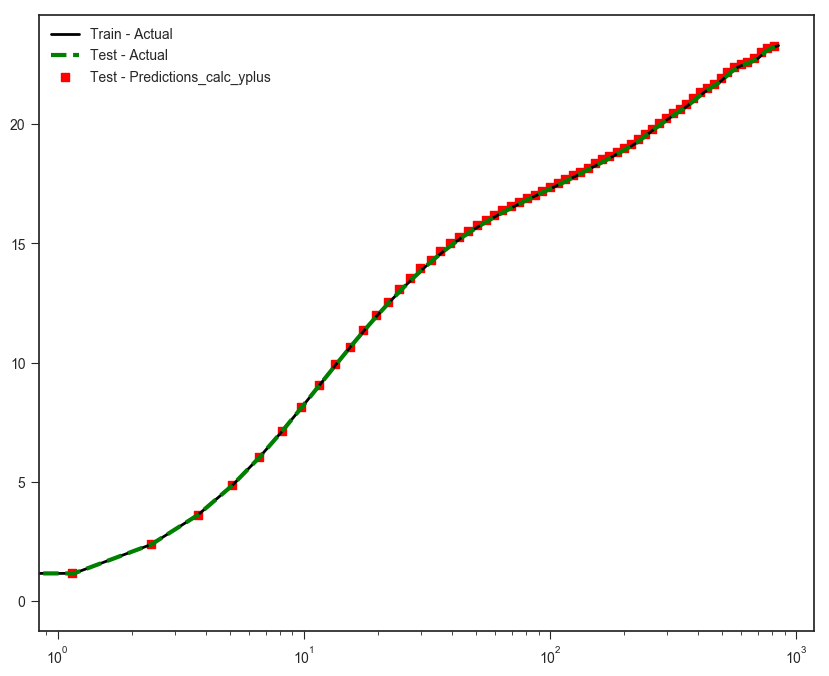

In [1314]:
plot_test(train_dim_preds_d_1, train_grid=64, test_grid=64)

### DIM - VELOC, DELTA, Y

In [2462]:
dim_params = dict(max_depth=2,
                      colsample_bytree=1,
                      subsample = 0.8,
                      learning_rate=0.01,
                      objective="reg:squarederror",
                      n_estimators =1,
                      silent=0,
                      #eval_metric="rmsle",
                      reg_alpha=0,
                      reg_lambda=0,
                      gamma=0.5,
                      booster='gbtree',)
model_dim_2 = xgb.train(params =dim_params, dtrain=dim_train_2,
                  num_boost_round=1, early_stopping_rounds=9, evals=dim_eval_2, verbose_eval=10)

[0]	train-rmse:16.9368	validation-rmse:16.9443	test-rmse:13.7207
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 9 rounds.


R2 score : -3.6442036943253244
RMSE score : 13.720556466926935


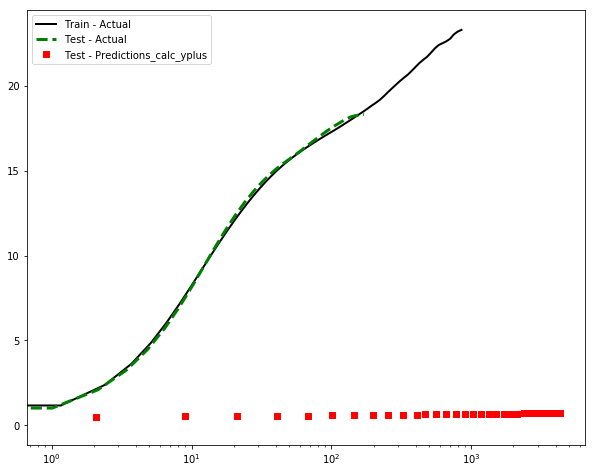

In [297]:
dim_preds_2 = process_testfile(clean_data_test,dim_test_2,model_dim_2)
plot_test(dim_preds_2, train_grid=64, test_grid=32)

In [133]:
dim_preds

,y_plus,delta,Points:1,u_tau,u_plus,VELOC:0,viscosity,pred_u_plus,calc_y_plus
0,0.000000,0.000000,0.000000,0.051059,0.000000,0.000000,0.000355,0.123726,0.000000
1,0.799828,0.005556,0.005556,0.051059,0.799828,0.040839,0.000355,0.900980,0.710033
2,1.695820,0.011781,0.011781,0.051059,1.693160,0.086451,0.000355,1.813204,1.583548
3,2.698822,0.018748,0.018748,0.051059,2.729391,0.139361,0.000355,2.879722,2.557935
4,3.820720,0.026542,0.026542,0.051059,3.926415,0.200480,0.000355,3.902912,3.843729
5,5.074491,0.035252,0.035252,0.051059,5.222560,0.266660,0.000355,5.032098,5.266557
6,6.474239,0.044975,0.044975,0.051059,6.505827,0.332182,0.000355,6.629330,6.353625
7,8.035223,0.055819,0.055819,0.051059,7.675036,0.391881,0.000355,7.601431,8.113028
8,9.773858,0.067897,0.067897,0.051059,8.691538,0.443783,0.000355,8.487043,10.009359
9,11.707691,0.081331,0.081331,0.051059,9.584407,0.489372,0.000355,9.576829,11.716955


In [2458]:
from xgboost import plot_tree

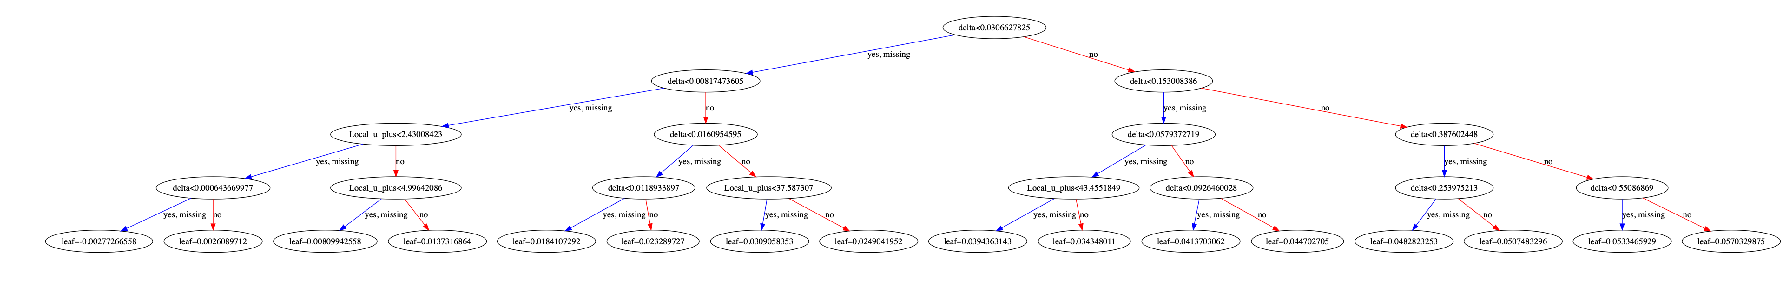

In [2468]:
fig, ax = plt.subplots(figsize=(20,40))
plot_tree(model_loc, num_trees=134, ax=ax, rankdir="ut")

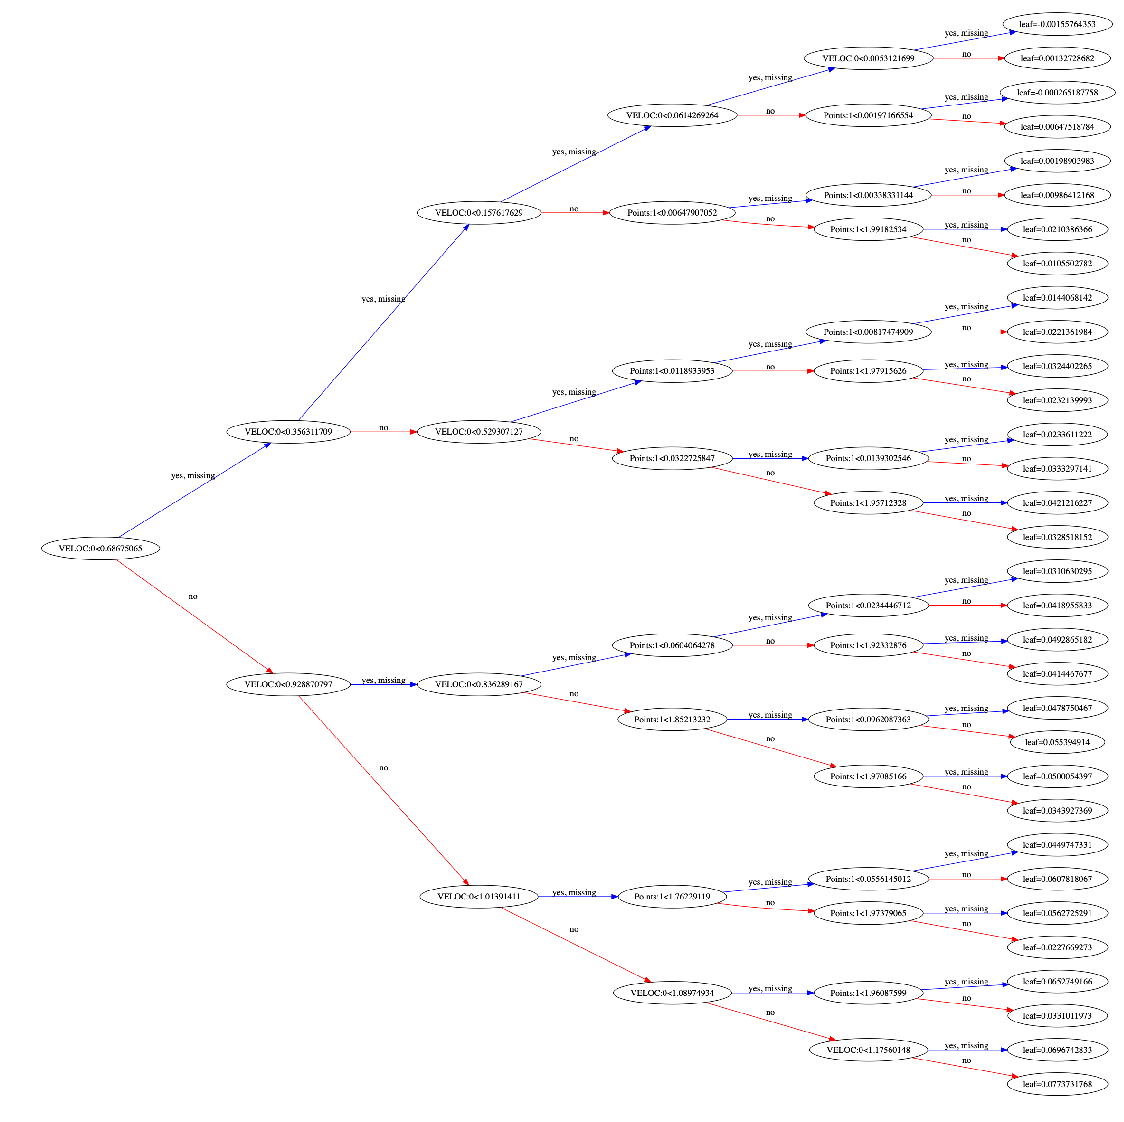

In [181]:
fig, ax = plt.subplots(figsize=(20,20))
plot_tree(model_v_y, num_trees=121, ax=ax, rankdir="LR")

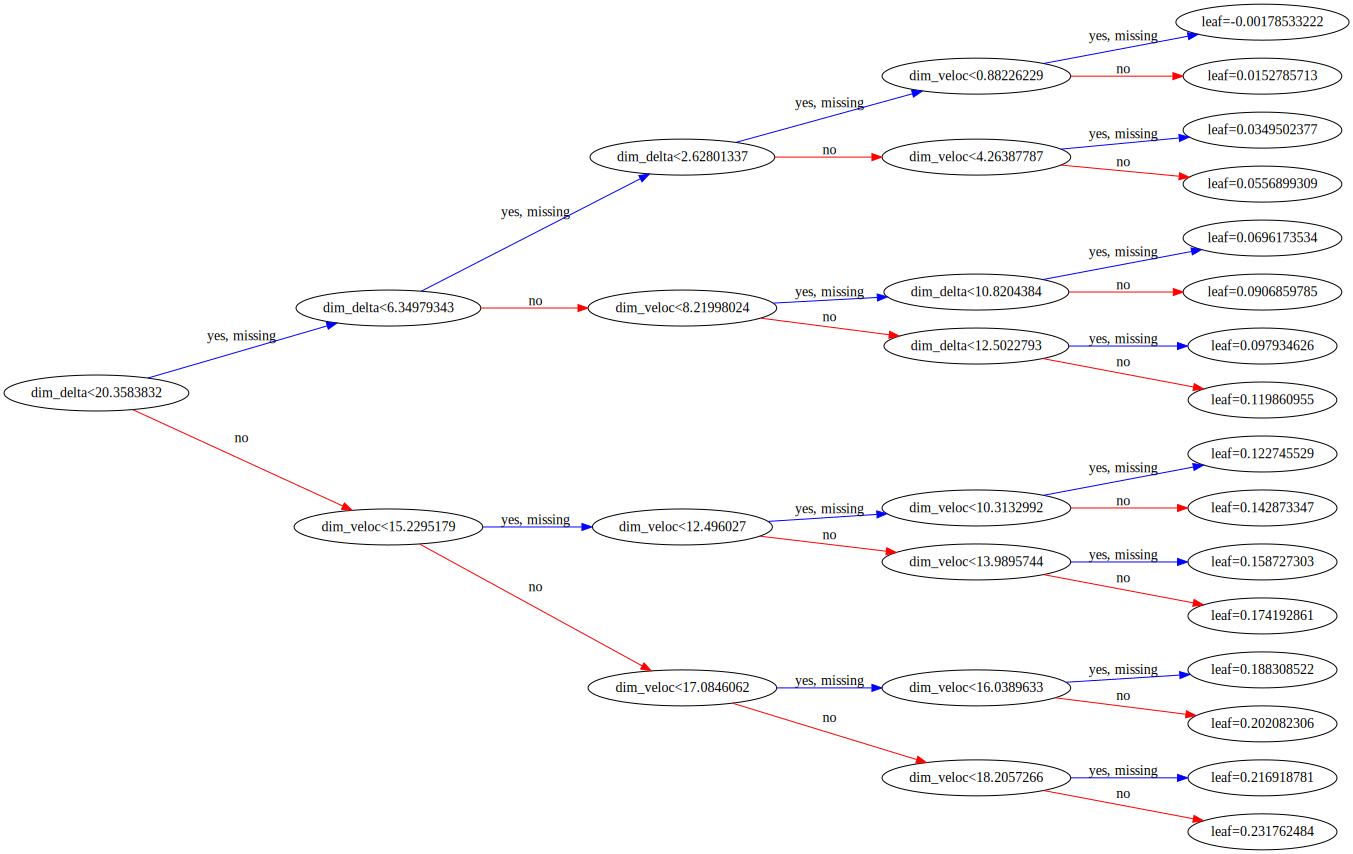

In [298]:
xgb.to_graphviz(model_dim_2, num_trees=0, rankdir="LR")

## PLOT train validation and test together

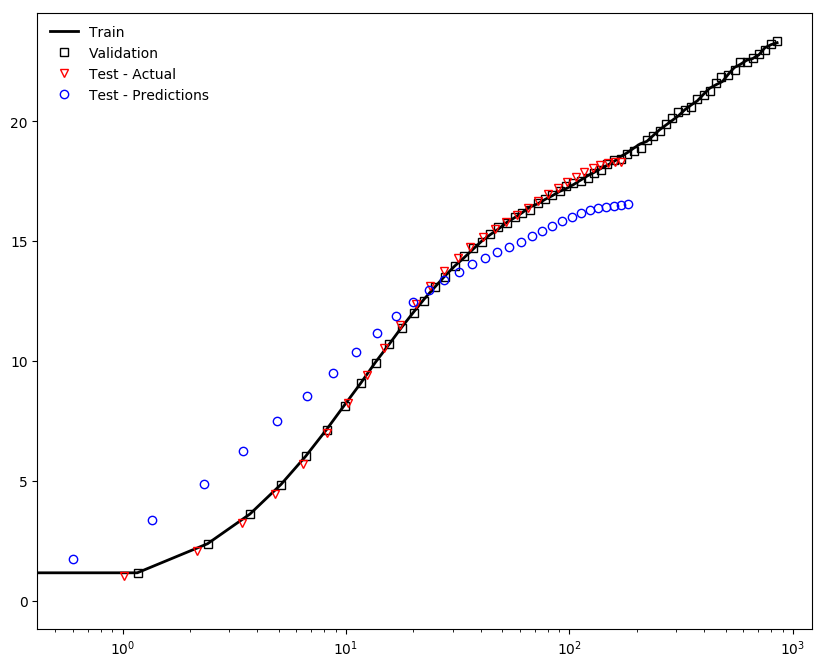

In [1301]:
train_grid=64
test_grid=32
plt.figure(figsize=(10,8))

means_test= clean_data_test.groupby("Points:1").aggregate(np.mean)
means_train = vy_train.groupby("Points:1").aggregate(np.mean)
means_val= vy_val.groupby("Points:1").aggregate(np.mean)
means_pred = v_y_preds.groupby("Points:1").aggregate(np.mean)

plt.plot(means_train['y_plus'].iloc[:train_grid],means_train['u_plus'].iloc[:train_grid],label="Train ",linewidth=2, color="black")
plt.plot(means_val['y_plus'].iloc[:train_grid],means_val['u_plus'].iloc[:train_grid],label="Validation", color="black",
         fillstyle="none",linestyle="", marker="s")
plt.plot(means_test['y_plus'].iloc[:test_grid],means_test['u_plus'].iloc[:test_grid], marker="v",color="red",linestyle="",
         fillstyle="none",label="Test - Actual")
plt.plot(means_pred['calc_y_plus'].iloc[:test_grid],means_pred['pred_u_plus'].iloc[:test_grid], marker="o", linestyle="",
            fillstyle="none",color="blue", label="Test - Predictions")
plt.xscale("log")
plt.xticks((1,10,100,1000))
plt.legend(frameon=False)

In [2515]:
preds = [clean_data_test, v_y_preds,loc_preds,dim_preds_1]
preds_d1 = [clean_test_mod_d_1, v_y_preds_d_1,loc_preds_d_1,dim_preds_d_1]
preds_d2 = [clean_test_mod_d_2, v_y_preds_d_2,loc_preds_d_2,dim_preds_d_2]
preds_v1 = [clean_test_mod_v_1, v_y_preds_v_1,loc_preds_v_1,dim_preds_v_1]
preds_v2 = [clean_test_mod_v_2, v_y_preds_v_2,loc_preds_v_2,dim_preds_v_2]

In [721]:
train_preds_d1 = [clean_train_mod_d_1, train_v_y_preds_d_1,train_loc_preds_d_1,train_dim_preds_d_1]
train_preds_d2 = [clean_train_mod_d_2, train_v_y_preds_d_2,train_loc_preds_d_2,train_dim_preds_d_2]
train_preds_v1 = [clean_train_mod_v_1, train_v_y_preds_v_1,train_loc_preds_v_1,train_dim_preds_v_1]
train_preds_v2 = [clean_train_mod_v_2, train_v_y_preds_v_2,train_loc_preds_v_2,train_dim_preds_v_2]

## PLOT all models on original 180

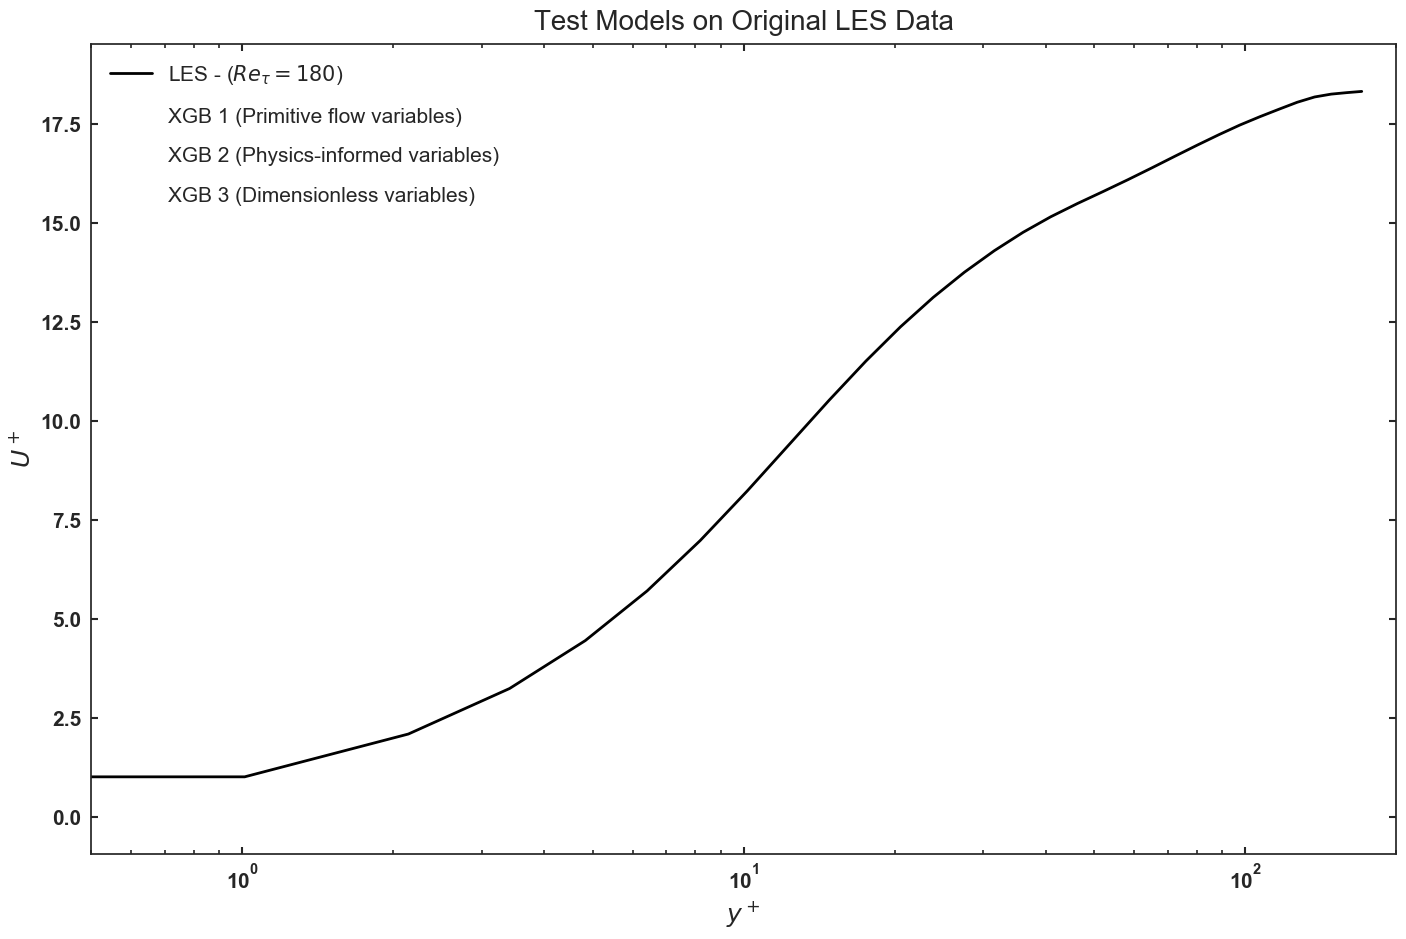

In [2497]:
plot_predictions(preds, title="Test Models on Original LES Data")

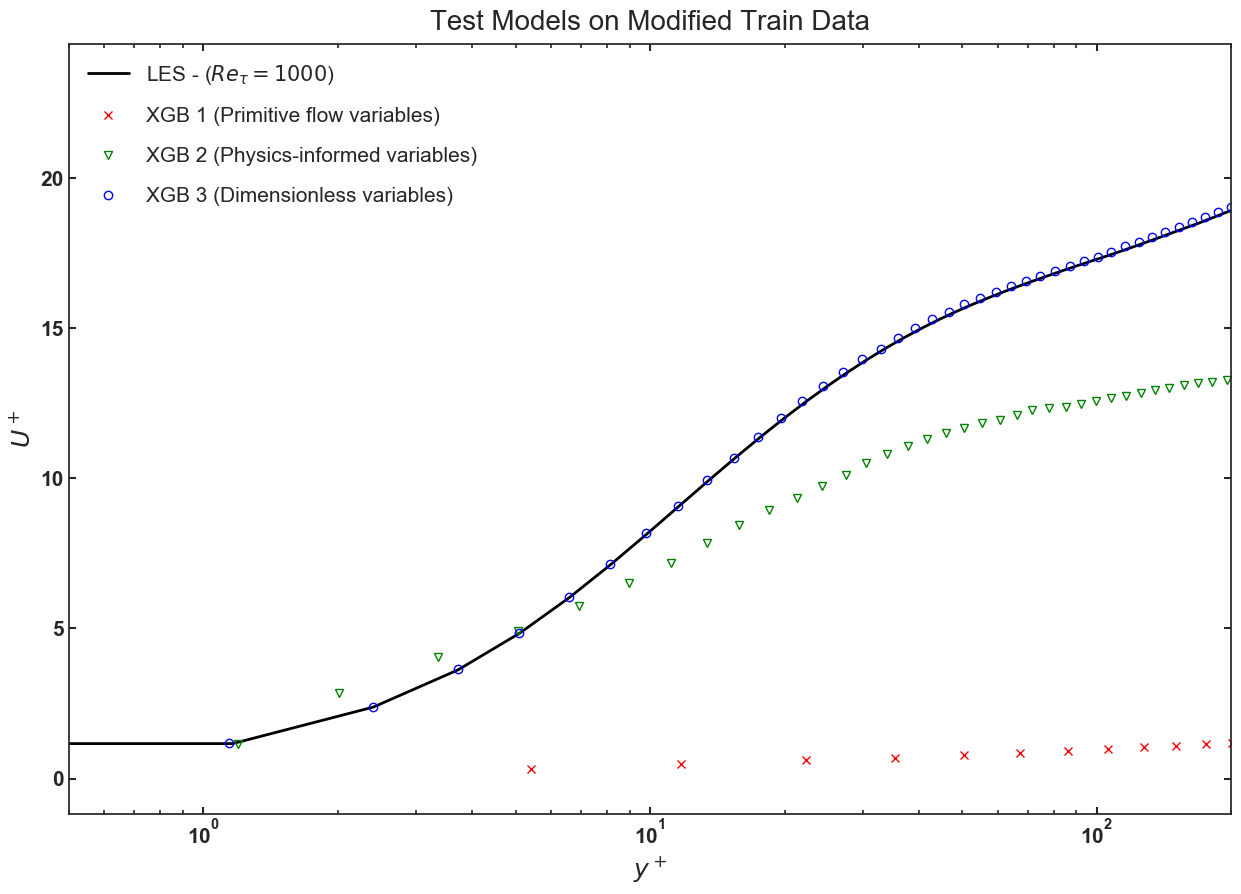

In [1784]:
plot_predictions(train_preds_d1, title="Test Models on Modified Train Data", test_grid=64)

# Plot all models on modified 180

## modified d1

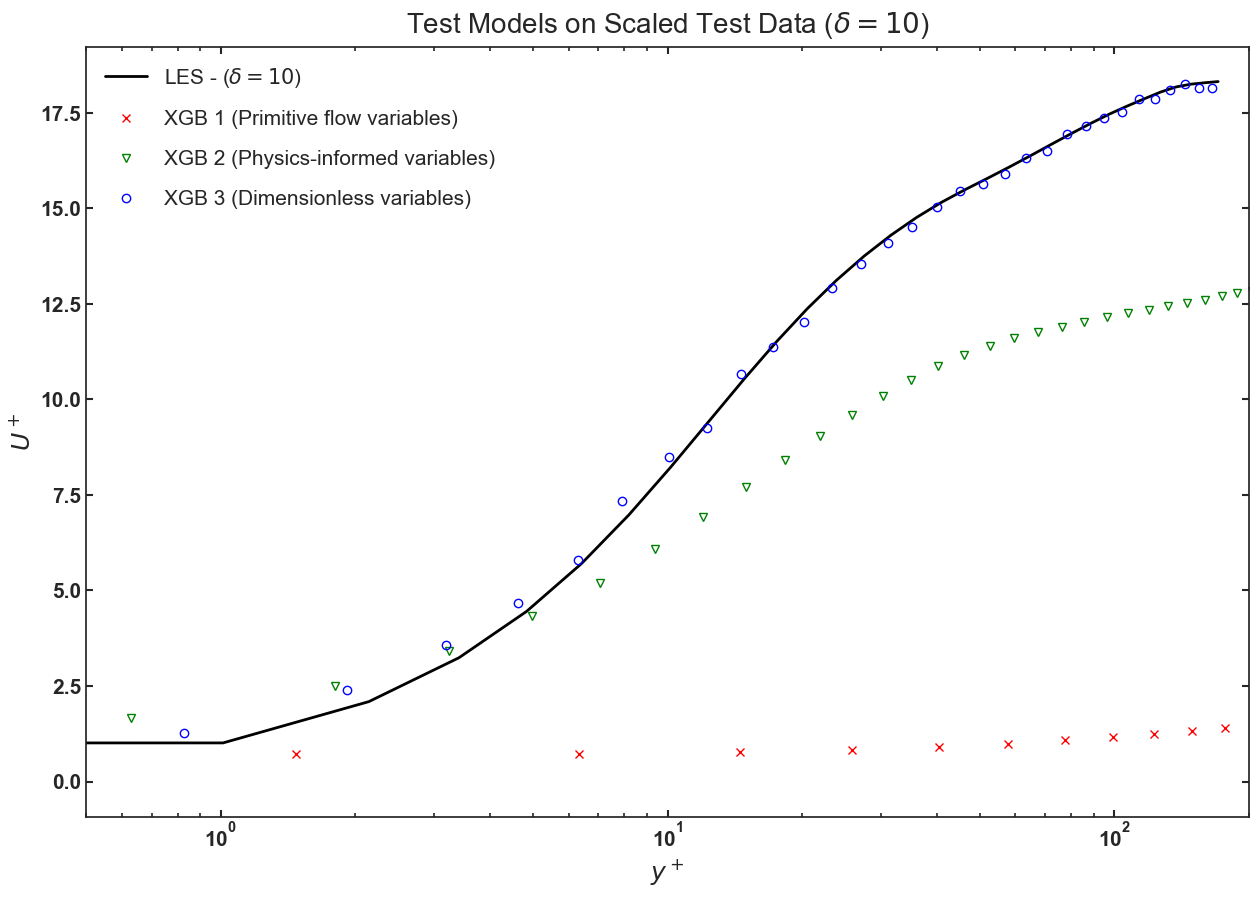

In [1921]:
#plot_predictions(preds,  plot_train=True, train_frame=clean_data_train)
plot_predictions(preds_d1, title=r"Test Models on Scaled Test Data ($\delta = 10$)", scaled=r"$\delta = 10$")

## modified d2

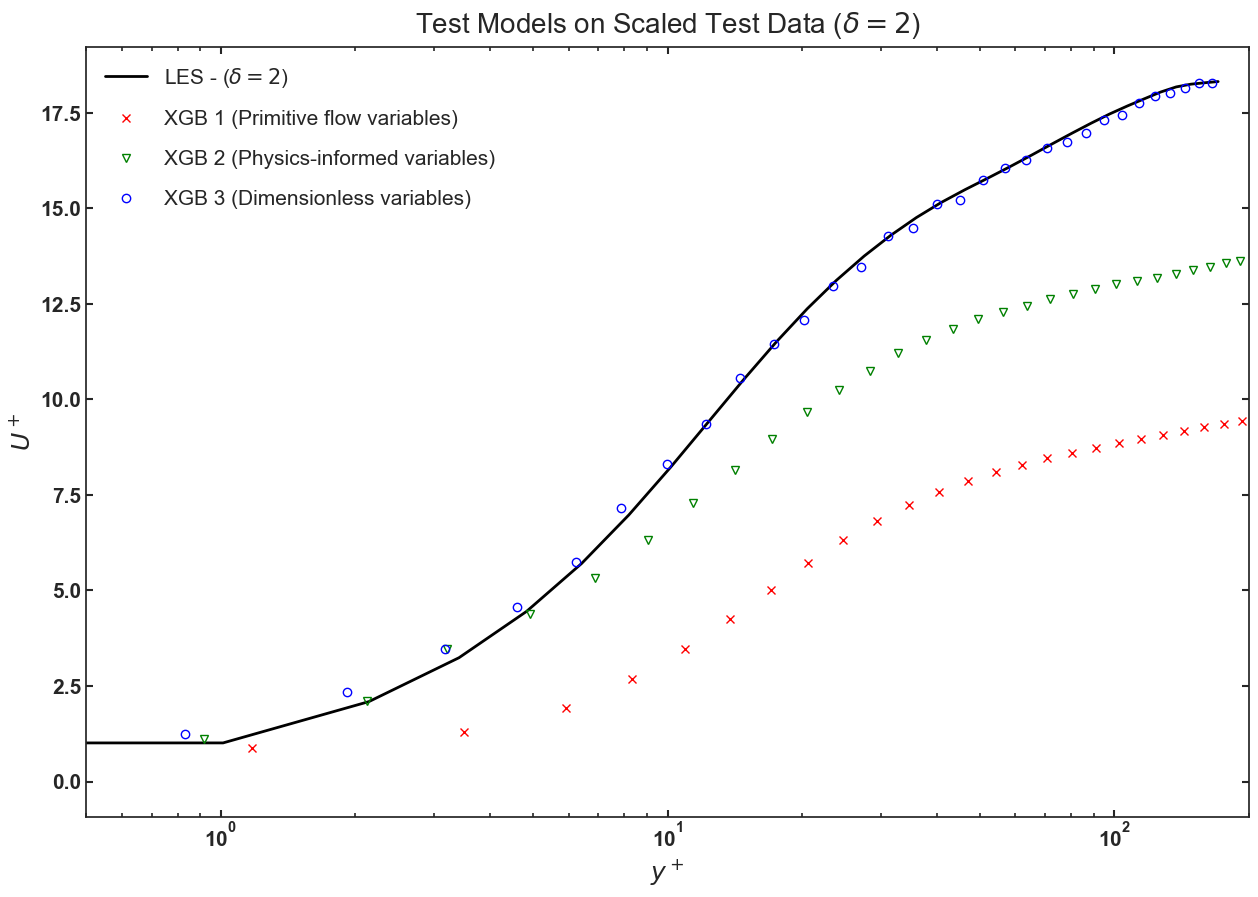

In [1922]:
plot_predictions(preds_d2,title=r"Test Models on Scaled Test Data ($\delta = 2$)", scaled=r"$\delta = 2$")

## modified v1

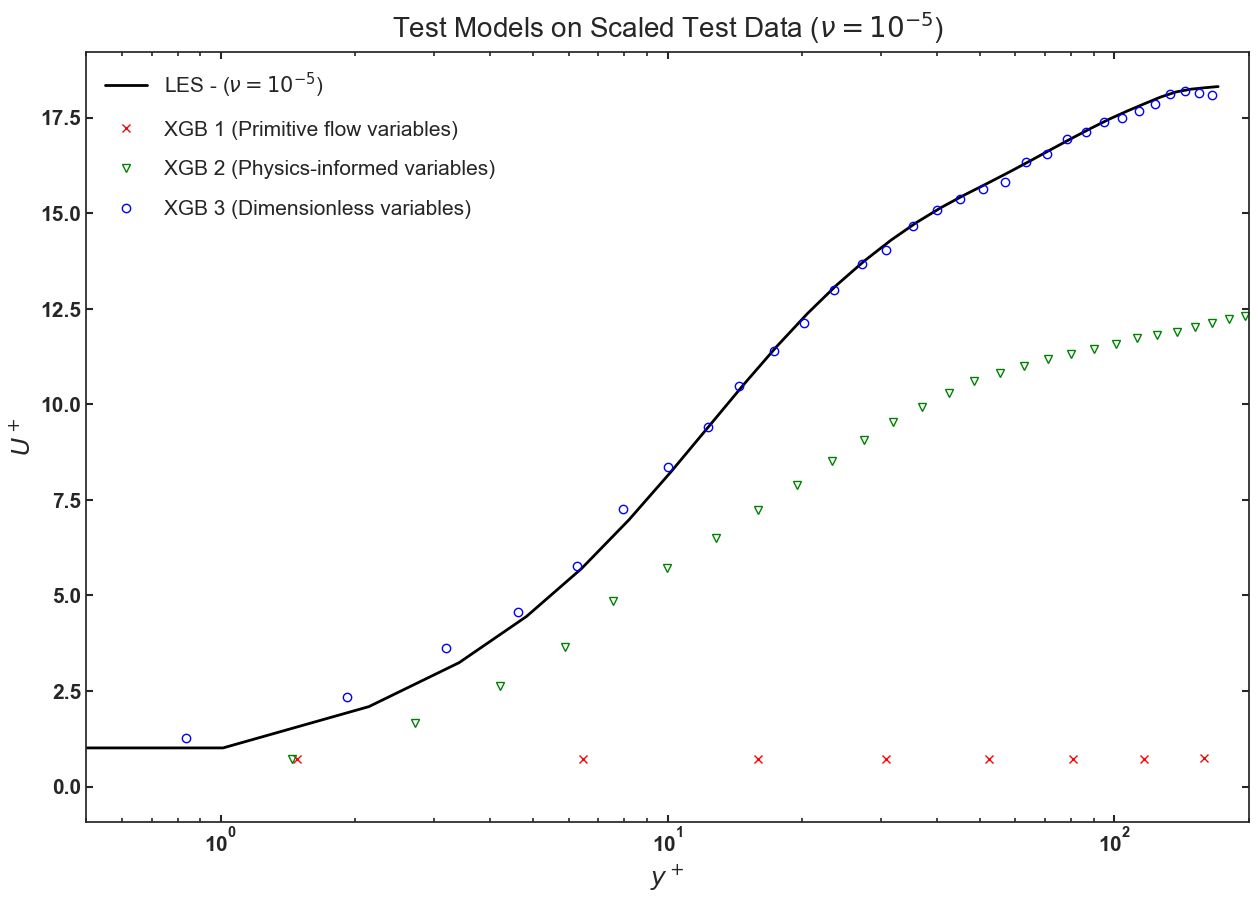

In [1923]:
plot_predictions(preds_v1, title=r"Test Models on Scaled Test Data ($\nu = 10^{-5}$)",scaled=r"$\nu = 10^{-5}$")

## modified v2

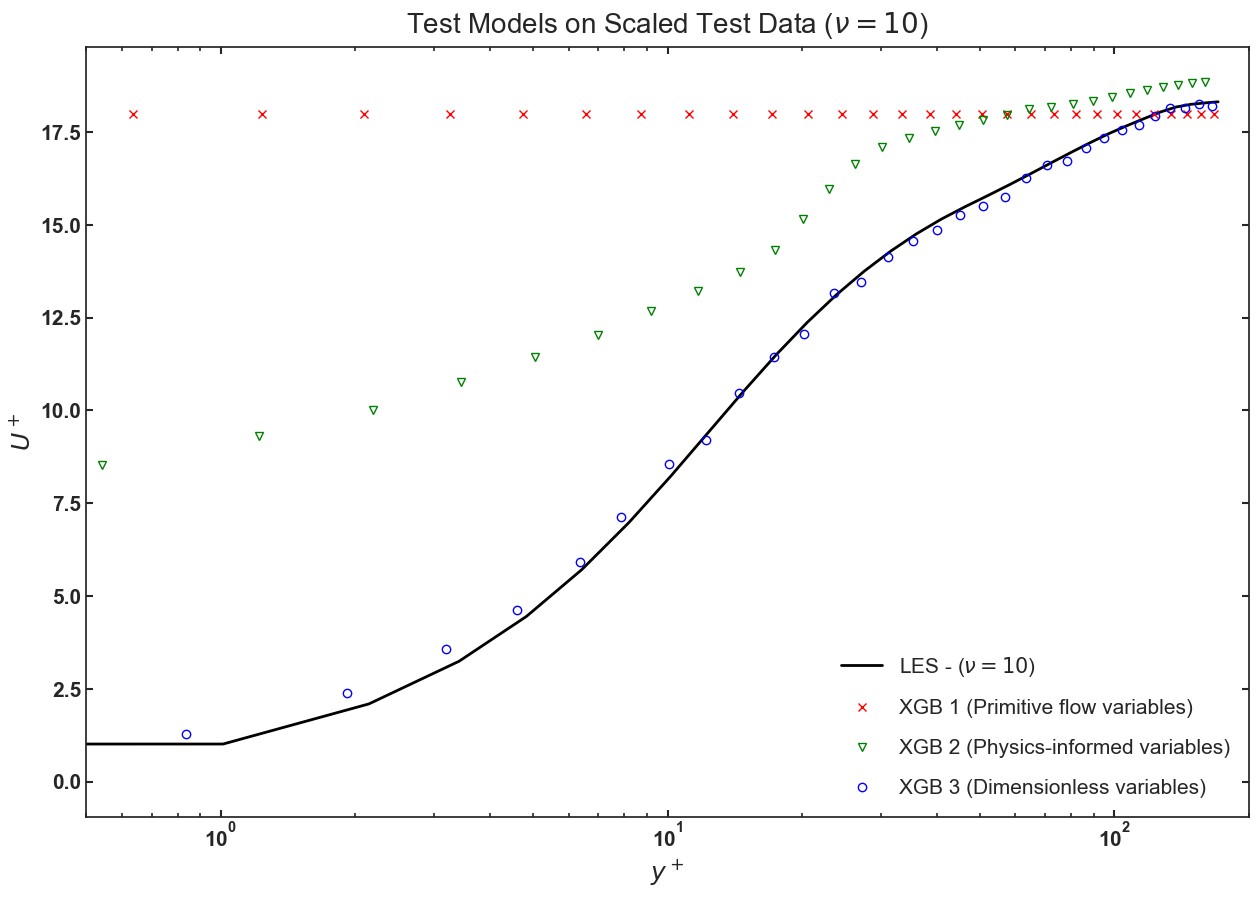

In [1924]:
plot_predictions(preds_v2, title=r"Test Models on Scaled Test Data ($\nu = 10$)",scaled=r"$\nu = 10$")

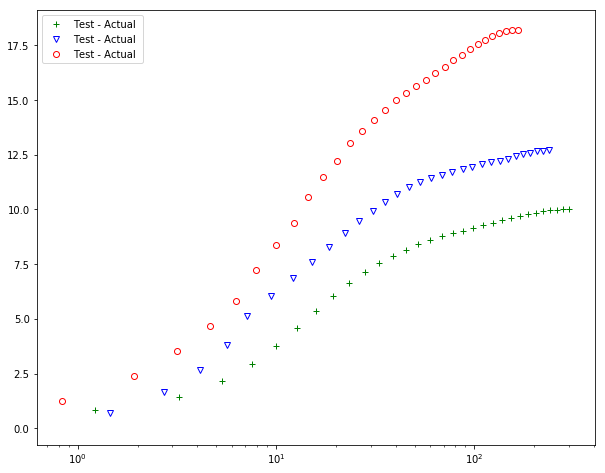

In [282]:
preds = [v_y_preds_mod,loc_preds_mod,dim_preds_1]
markers = ["+","v","o","x"]
colors = ["green","blue","red"]
plt.figure(figsize=(10,8))
for idx, pred in enumerate(preds):
    means = pred.groupby("Points:1").aggregate(np.mean)
    plt.plot(means['calc_y_plus'].iloc[:test_grid],means['pred_u_plus'].iloc[:test_grid],label="Test - Actual ",linestyle="", fillstyle="none",
             marker = markers[idx], color=colors[idx])
plt.xscale("log")
plt.xticks((1,10,100))
plt.legend()

In [474]:
import seaborn as sns

In [2292]:
preds_test = preds_d1[3].copy()
#preds_test = loc_preds
preds_test['abs_residual'] = np.abs(preds_test.u_plus - preds_test.pred_u_plus)
preds_test['residual'] = preds_test.u_plus - preds_test.pred_u_plus
#preds_test['residual'] = np.abs(preds_test.u_plus_log - preds_test.prediction)

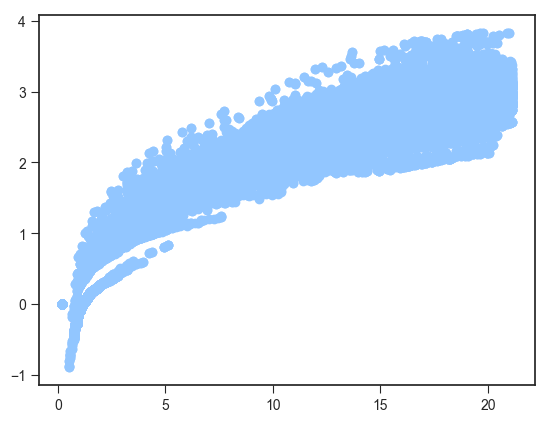

In [1317]:
plt.scatter(preds_test.prediction, preds_test.u_plus_log)

In [2261]:
def compare_predictions(prediction_frame):
    prediction_file = prediction_frame.copy()
    prediction_file['residual'] = np.abs(prediction_file.u_plus - prediction_file.pred_u_plus)
    fig, ax = plt.subplots(figsize=(12,10))
    surf = prediction_file.plot.scatter(x="pred_u_plus" ,y="u_plus", c="residual", colormap="jet", alpha=0.5, ax=ax , fontsize=15)
    plt.scatter(prediction_file.groupby('Points:1').mean().pred_u_plus.iloc[:32], 
                prediction_file.groupby('Points:1').mean().u_plus.iloc[:32], color="black", label=r"$U^+$ (mean)")
    cbar = surf.collections[0].colorbar
    cbar.set_label("Residual",size=15)
    cbar.ax.tick_params(labelsize=14)
    plt.xlabel("$U^+$ (Predicted) ", fontsize=15)
    plt.ylabel("$U^+$ (Actual) ", fontsize=15)
    plt.legend(frameon=False, fontsize=15)
    plt.show()
#plt.xlim(0,40)

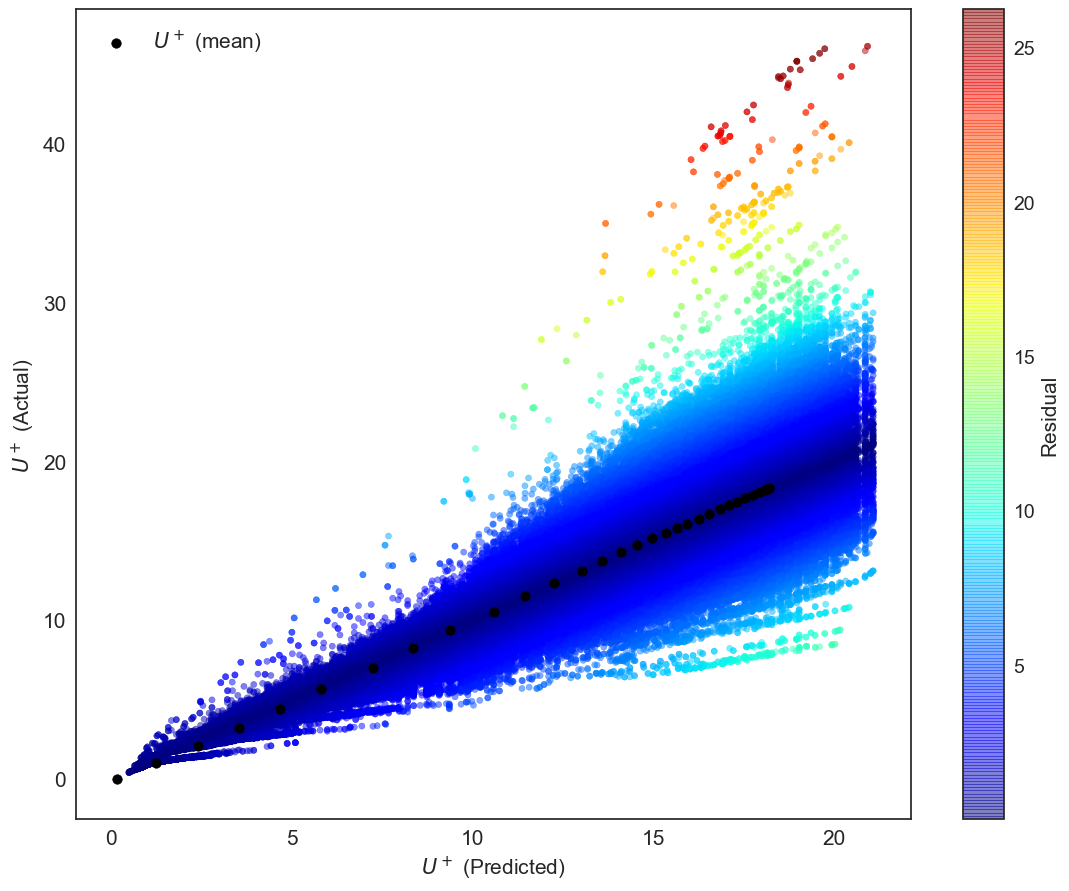

In [2270]:
#compare_predictions(preds_v2[3])
compare_predictions(preds_test)

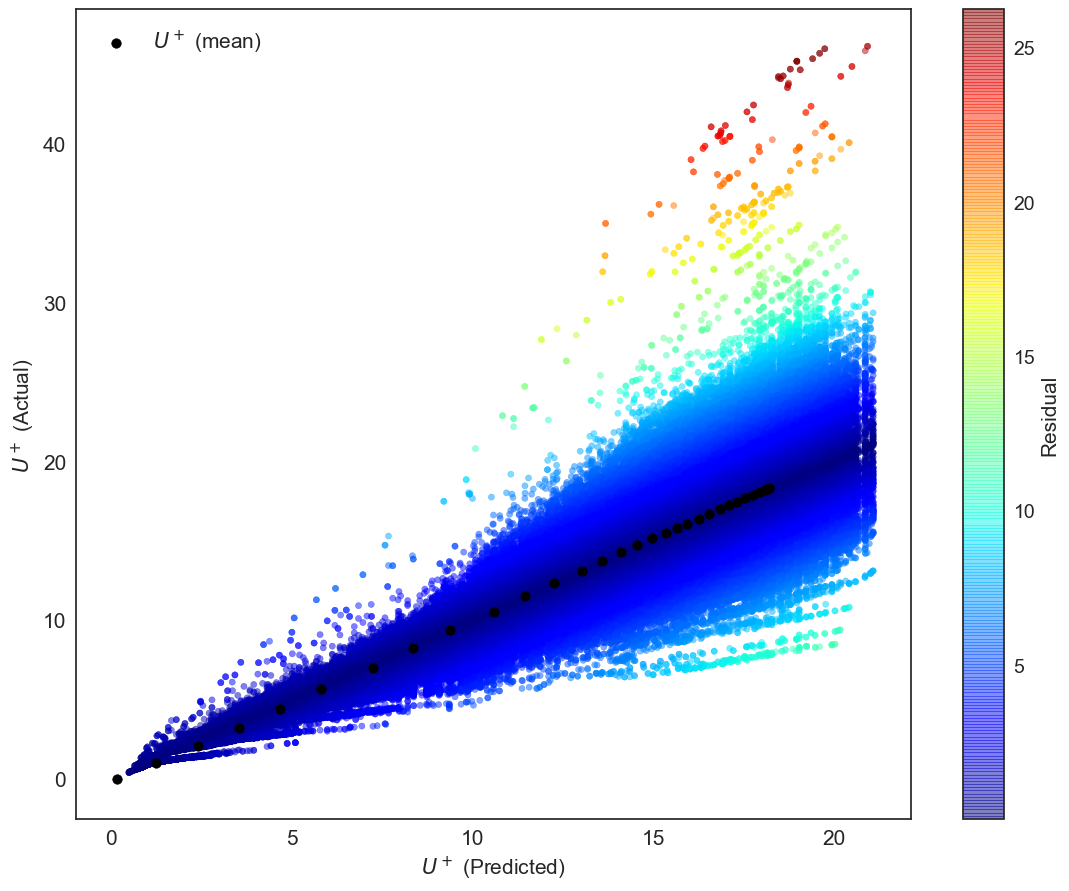

In [2501]:
compare_predictions(preds[3])

In [2361]:
stats.spearmanr(pred_file.groupby("Points:1").mean().pred_u_plus, 
                 pred_file.groupby("Points:1").mean().residual, )

SpearmanrResult(correlation=0.7324679298061584, pvalue=4.078058079227177e-12)

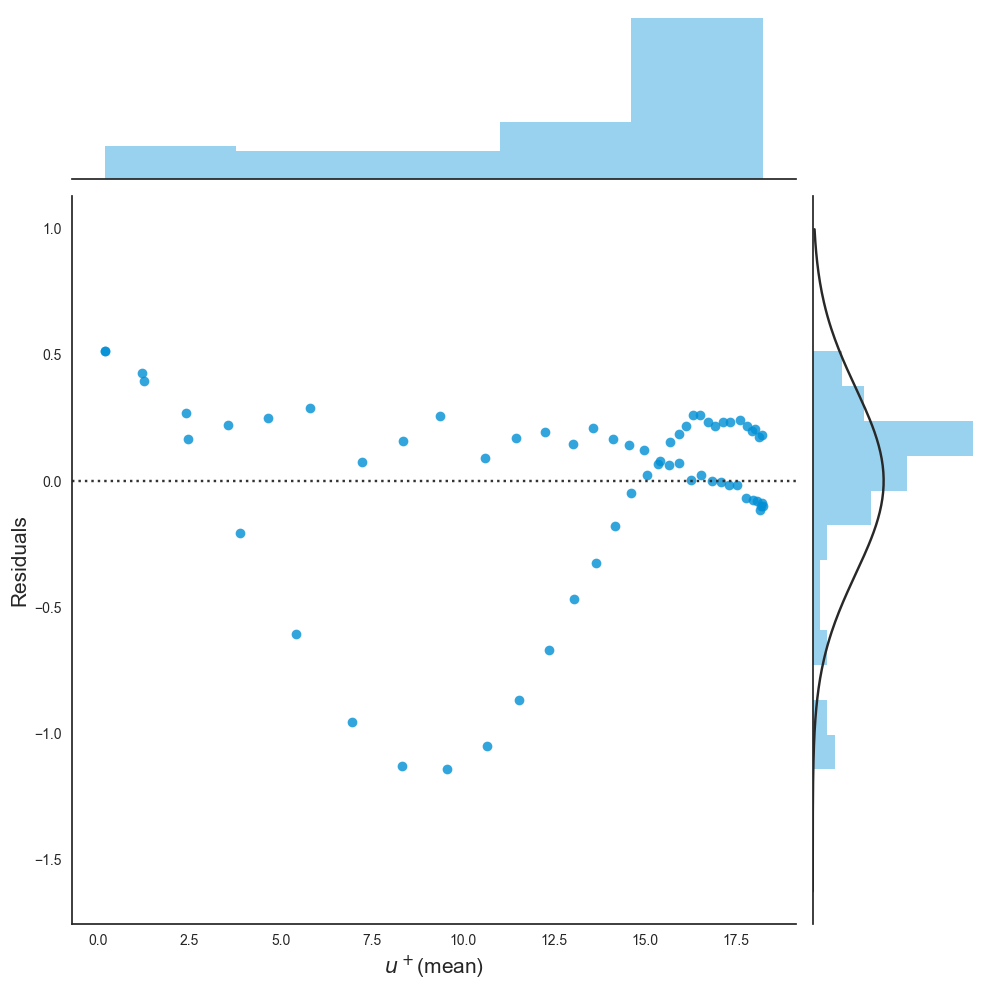

In [2364]:
g =sns.jointplot(pred_file.groupby("Points:1").mean().pred_u_plus, 
                 pred_file.groupby("Points:1").mean().residual, 
                 kind="residual", height=10, ratio=4, space=0.1,)
g.set_axis_labels(xlabel=f"$u^+$(mean)", ylabel="Residuals", fontsize=15)


In [2536]:
pred_file = preds_v2[3].copy()
#preds_test = loc_preds
pred_file['abs_residual'] = np.abs(pred_file.u_plus - pred_file.pred_u_plus)
pred_file['residual'] = pred_file.u_plus - pred_file.pred_u_plus

Text(0.4, 0.98, 'Residual Plot ($\\nu = 10^{-5}$)')

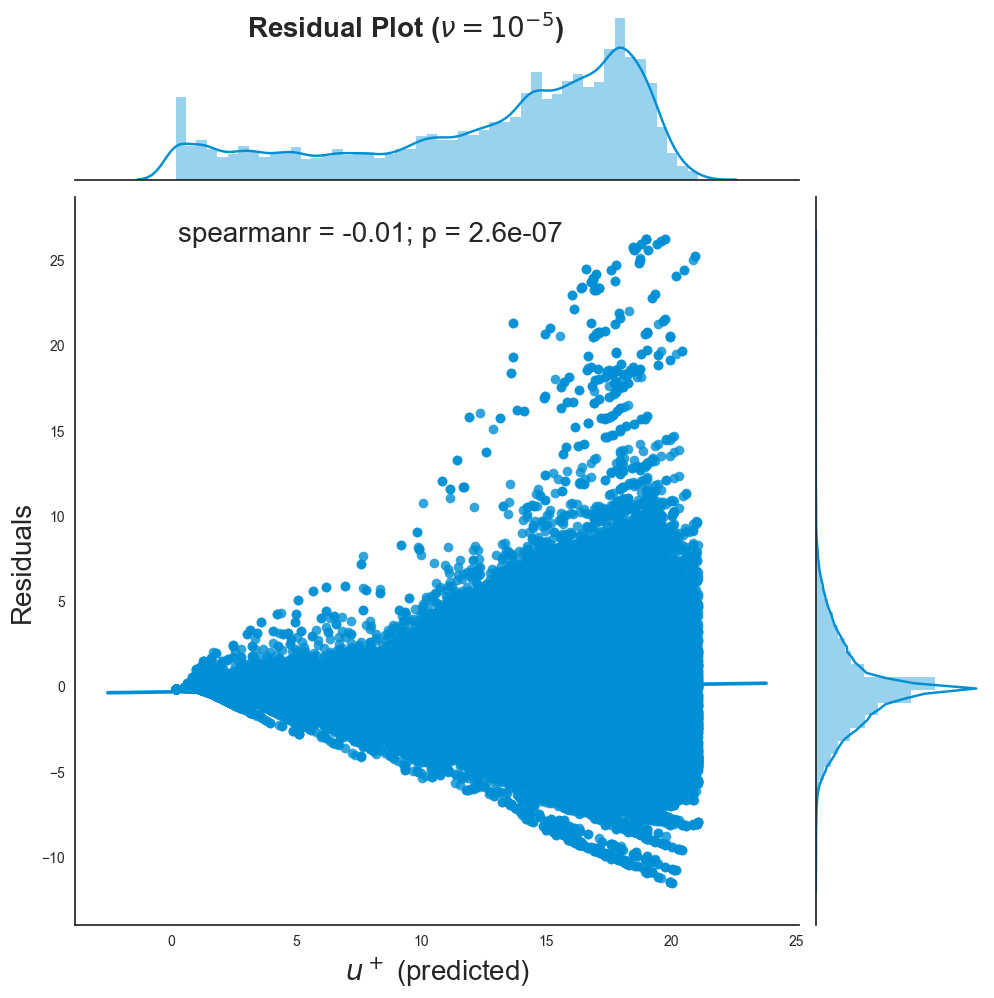

In [2522]:
g =sns.jointplot(pred_file.pred_u_plus, pred_file.residual, kind="reg", height=10,
              ratio=4, space=0.1,)
g.set_axis_labels(xlabel=f"$u^+$ (predicted)", ylabel="Residuals", fontsize=20)
g.annotate(stats.spearmanr, fontsize=20)
#g.annotate(stats.pearsonr, fontsize=20)
#margiabsnal_kws=dict(rug=True)
g.fig.suptitle("Residual Plot "+r"($\nu = 10^{-5}$)", fontweight="heavy", fontsize=20, x=0.4)

In [2294]:
import seaborn as sns
import scipy.stats as stats

stats.pearsonr(preds_test.pred_u_plus, preds_test.residual)

(0.04173564437541762, 4.548754146623013e-12)

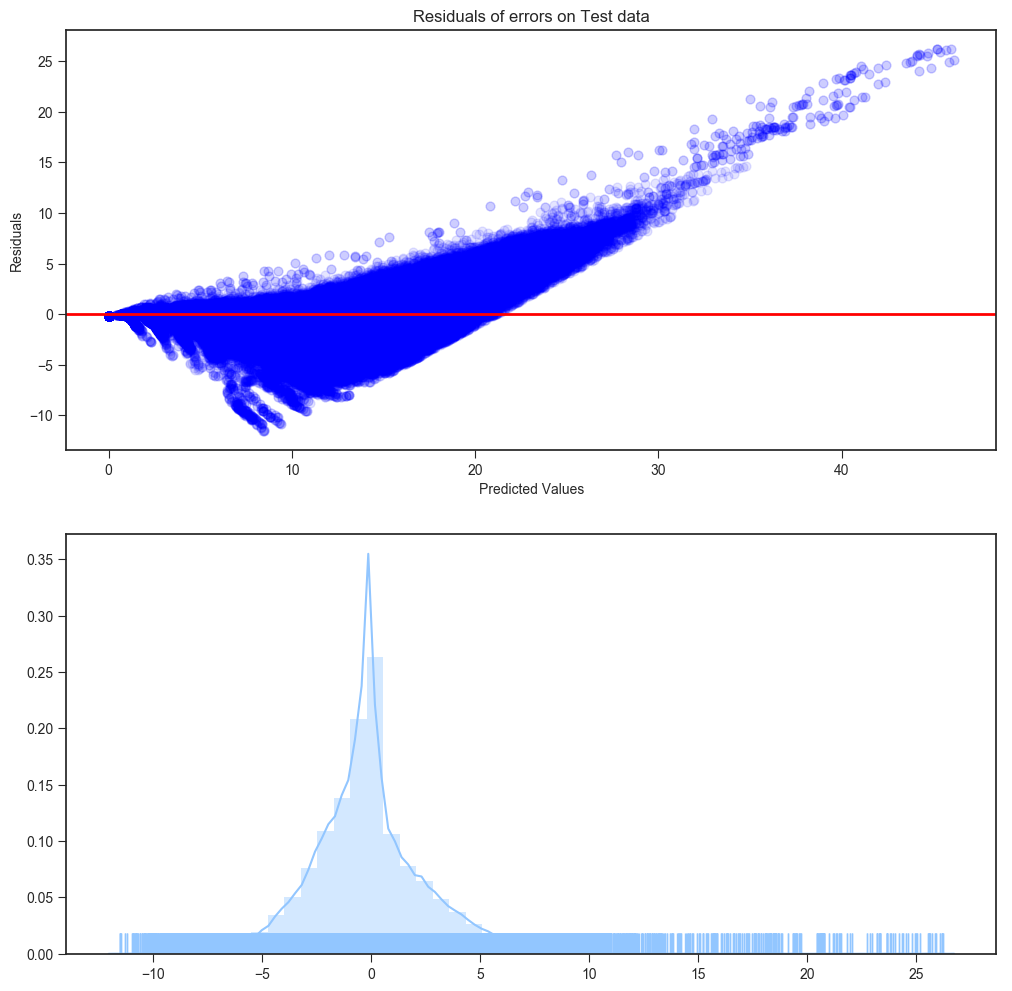

In [1329]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)
ax[0].scatter(preds_test.u_plus, preds_test.u_plus - preds_test.pred_u_plus,c="b", s=40, alpha=0.1)
ax[0].axhline(lw=2, color="red")
ax[0].set(title="Residuals of errors on Test data")
ax[0].set_ylabel("Residuals")
ax[0].set_xlabel("Predicted Values")
#ax[0].set_xlim(0, 20)
sns.distplot(preds_test.u_plus - preds_test.pred_u_plus, kde=True, rug=True, ax=ax[1])
#ax[1].set_xlim(-20,20)

In [1328]:
np.mean(preds_test.u_plus_log - preds_test.prediction)

-10.568090849107682

Text(0.5, 0, 'Theoretical Quantities')

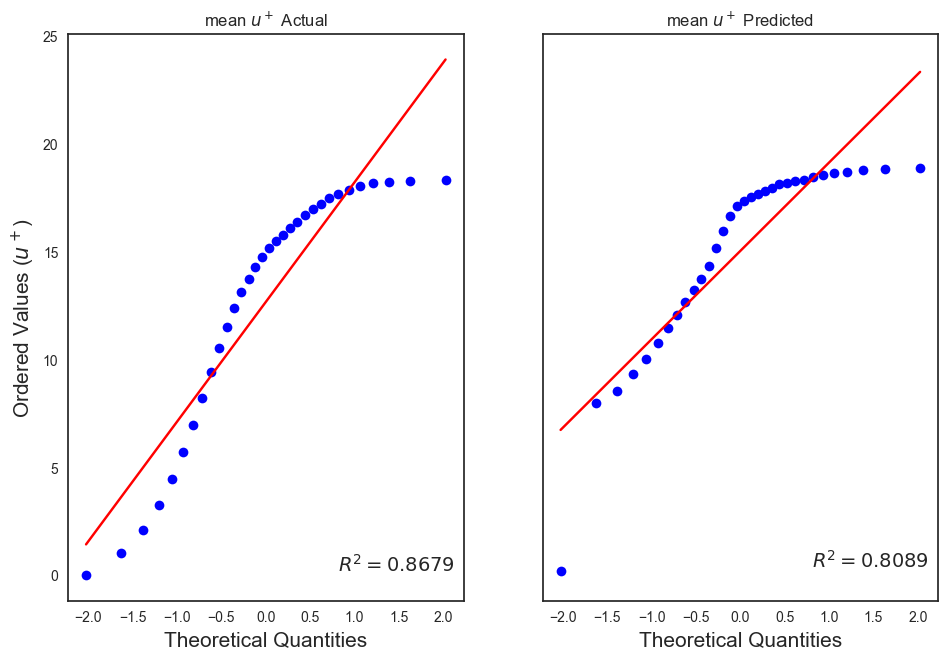

In [2207]:
fig, ax = plt.subplots(figsize=(10,7),ncols=2, sharey=True, sharex=True)
scipy.stats.probplot(preds_test.groupby("Points:1").mean().u_plus.iloc[:32],plot=ax[0], rvalue=True);
scipy.stats.probplot(preds_test.groupby("Points:1").mean().pred_u_plus.iloc[:32],plot=ax[1], rvalue=True);
ax[0].set_title(r"mean $u^+$ Actual")
ax[1].set_title(r"mean $u^+$ Predicted")
ax[0].set_ylabel(r"Ordered Values ($u^+$)", fontsize=15, )
ax[1].set_ylabel(" " )
ax[0].set_xlabel(r"Theoretical Quantities", fontsize=15, )
ax[1].set_xlabel("Theoretical Quantities", fontsize=15, )

''

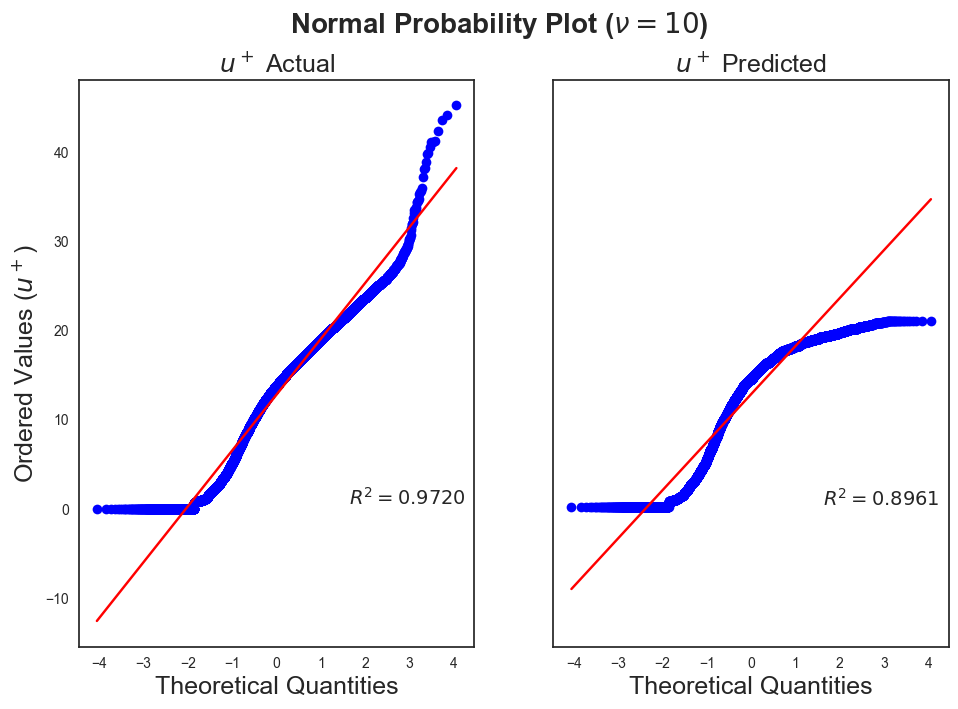

In [2504]:
fig, ax = plt.subplots(figsize=(10,7),ncols=2, sharey=True, sharex=True)
scipy.stats.probplot(preds_v2[3].u_plus,plot=ax[0], rvalue=True);
scipy.stats.probplot(preds_v2[3].pred_u_plus,plot=ax[1], rvalue=True);
ax[0].set_title(r"$u^+$ Actual",fontsize=18)
ax[1].set_title(r"$u^+$ Predicted",fontsize=18)
ax[0].set_ylabel(r"Ordered Values ($u^+$)", fontsize=18, )
ax[1].set_ylabel(" " )
ax[0].set_xlabel(r"Theoretical Quantities", fontsize=18, )
ax[1].set_xlabel("Theoretical Quantities", fontsize=18, )
#scipy.stats.probplot(np.sqrt(preds_test.u_plus),plot=ax[2]);
#scipy.stats.probplot(preds_test.u_plus.apply(calc_log),plot=ax[1]);
fig.suptitle("Normal Probability Plot "+ r"($\nu=10$)", fontweight="heavy", fontsize=20,)
;

Text(0, 0.5, 'Residuals')

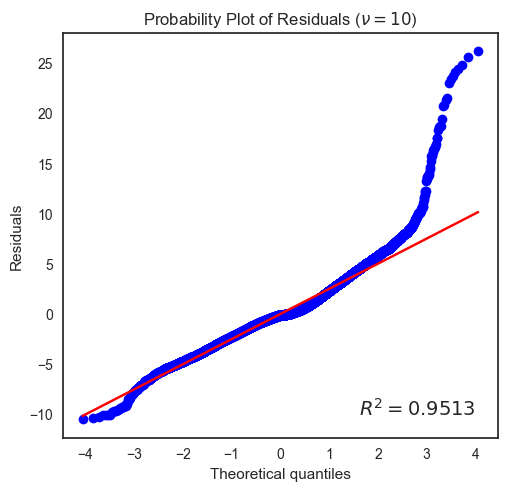

In [2537]:
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
scipy.stats.probplot(pred_file.residual,plot=ax, rvalue=True);
#scipy.stats.probplot(preds_test.u_tau,plot=ax[1], rvalue=True);
plt.title(r"Probability Plot of Residuals ($\nu=10$)")
plt.ylabel("Residuals")

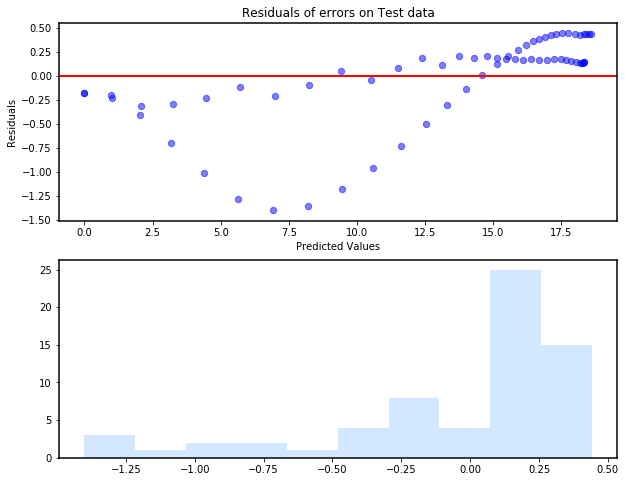

In [865]:
x = preds_test.groupby("Points:1").mean().u_plus
y = x - preds_test.groupby("Points:1").mean().pred_u_plus
fig, ax = plt.subplots(figsize=(10,8), nrows=2)
ax[0].scatter(x, y ,c="b", s=40, alpha=0.5)
ax[0].axhline(lw=2, color="red")
ax[0].set(title="Residuals of errors on Test data")
ax[0].set_ylabel("Residuals")
ax[0].set_xlabel("Predicted Values")
sns.distplot(y, kde=False, ax=ax[1])

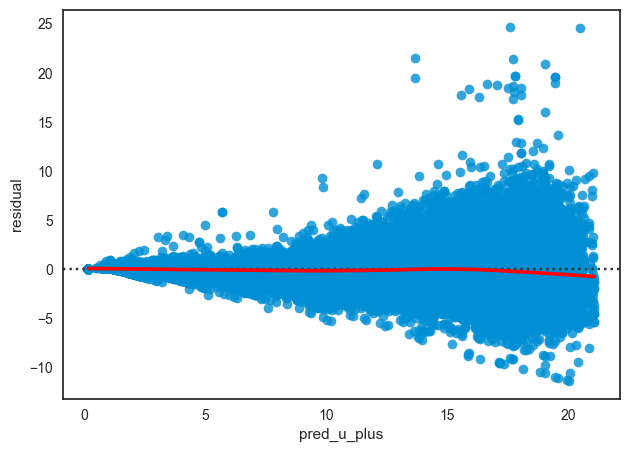

In [2518]:
sns.residplot(preds_test.pred_u_plus, preds_test.residual, lowess=True,line_kws=dict(color="red"), robust=True)

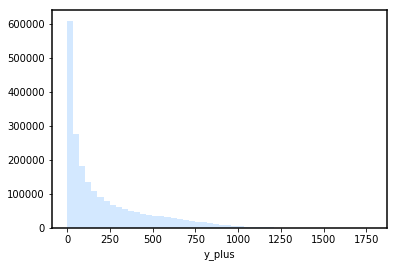

In [843]:
sns.distplot(train_1000_frame.y_plus, kde=False)

(0, 22)

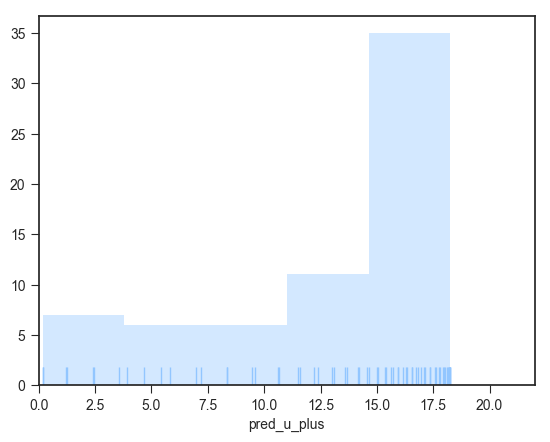

In [1374]:
ax = sns.distplot(preds[3].groupby("Points:1").mean().pred_u_plus, rug=True, kde=False)
ax.set_xlim(0,22)

(0, 22)

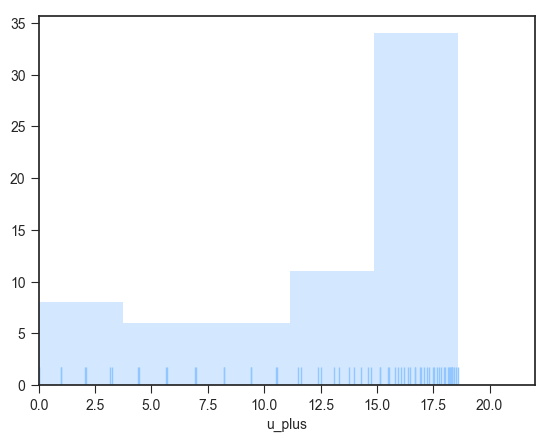

In [1376]:
ax = sns.distplot(preds[3].groupby("Points:1").mean().u_plus,rug=True, kde=False)
ax.set_xlim(0,22)

In [ ]:
    
    plt.rcParams["axes.linewidth"]  = 1.5
    fig, ax = plt.subplots(figsize=(15,10))
    
    if plot_train and train_frame is not None :
        means_train = train_frame.groupby("Points:1").aggregate(np.mean)
        plt.plot(means_train['y_plus'].iloc[:train_grid],means_train['u_plus'].iloc[:train_grid],label=f"Train - ({train_name})",linewidth=2, color="black", linestyle="--")
    plt.plot(means_test['y_plus'].iloc[:test_grid],means_test['u_plus'].iloc[:test_grid],label=f"Test - ({test_name}) ",linewidth=2, color="black")
    plt.plot(means_v_y_mod['calc_y_plus'].iloc[:test_grid],means_v_y_mod['pred_u_plus'].iloc[:test_grid], marker="x",color="red", fillstyle="none", 
                linestyle=" ",label="XGB 1 (Primitive flow variables)")
    plt.plot(means_loc_mod['calc_y_plus'].iloc[:test_grid],means_loc_mod['pred_u_plus'].iloc[:test_grid],label="XGB 2 (Physics-informed variables)", color="green",linestyle=" ",
             fillstyle="none",marker="v")
    plt.plot(means_dim_mod['calc_y_plus'].iloc[:test_grid],means_dim_mod['pred_u_plus'].iloc[:test_grid], marker="o",color="blue", linestyle=" ", 
                fillstyle="none", label="XGB 3 (Dimensionless variables)")
    
    
    plt.xscale("log")
    plt.xticks((1,10,100), fontsize=11,fontweight="heavy")
    plt.yticks(fontweight="heavy")
    plt.xlabel(r"$y^+$", fontsize=12, fontweight="heavy")
    plt.ylabel(r"$U^+$", fontsize=12, fontweight="heavy")
    plt.legend(frameon=False, labelspacing=1, fontsize=12)
    ax.tick_params(direction="in",right=True, top=True, labelsize=11, which="major",width=1.5,length=5)
    ax.tick_params(direction="in",right=True, top=True, which="minor",width=1.2,length=3)
    #plt.xlim(np.min(means_test.u_plus),200)
    plt.xlim(0.5,200)
    ax.set_title(title,pad=5)
    plt.show()

In [1863]:
best_iter, train_score, val_score, test_score = model_dim_1.attributes()['best_msg'].split("\t")
" :  ".join(train_score.split(":")).upper()

'TRAIN-RMSE \t:\t 4.13781'

## plot results

In [1870]:
def plot_fit(model,train_results=None, save=False, save_path=None):
    """
    Function to plot train and test(validation) results of a training or a model fitting
    Input:
        - Results of fit or training
    """
    best_iter, train_score, val_score, test_score = model.attributes()['best_msg'].split("\t")
    best_iter = eval(best_iter)[0]
    train_score = "  :  ".join(train_score.split(":")).upper()
    test_score = "  :  ".join(test_score.split(":")).upper()
    val_score = "  :  ".join(val_score.split(":")).upper()
    # plot evolution of training and validation results
    if train_results:
        results =train_results
    else:
        results = model.evals_result()
    epochs = len(results['train']['rmse'])
    x_axis = range(0, epochs)

    # plot RMSE
    plt.rcParams["axes.linewidth"]  = 1.5
    fig, ax = plt.subplots(figsize=(15,10))
    ax.plot(x_axis, results['train']['rmse'], label='Train', c="b", )
    ax.plot(x_axis, results['validation']['rmse'], label='Validation', c="r",marker="x", markersize=3, linestyle=" ")
    ax.plot(x_axis, results['test']['rmse'], label='Test', c="g")
    plt.axvline(x=model.best_iteration,color="black", linestyle="--")
    plt.annotate(fr"Optimum iteration ({best_iter})" ,xy=(best_iter, 10), xytext=(best_iter - 60 , 12),
                arrowprops=dict(facecolor='black', shrink=0.001), fontsize=18)
    plt.text(0.5, 0.9,"%s\n %s\n %s" %(train_score, val_score, test_score),horizontalalignment='center',
             verticalalignment='center',transform = ax.transAxes, fontsize=13)
    plt.xticks( fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_title(" Model Error Evolution during Training", fontsize=15, pad=7)
    ax.set_xlabel("Iteration", fontsize=18)
    ax.set_ylabel("RMSE", fontsize=18)
    ax.legend(frameon=False, fontsize=18, labelspacing=1)
    if save:
        if save_path:
            fig.savefig("%s/training_evolution.png"%save_path)
        else:
            fig.savefig("model_evolution.png")

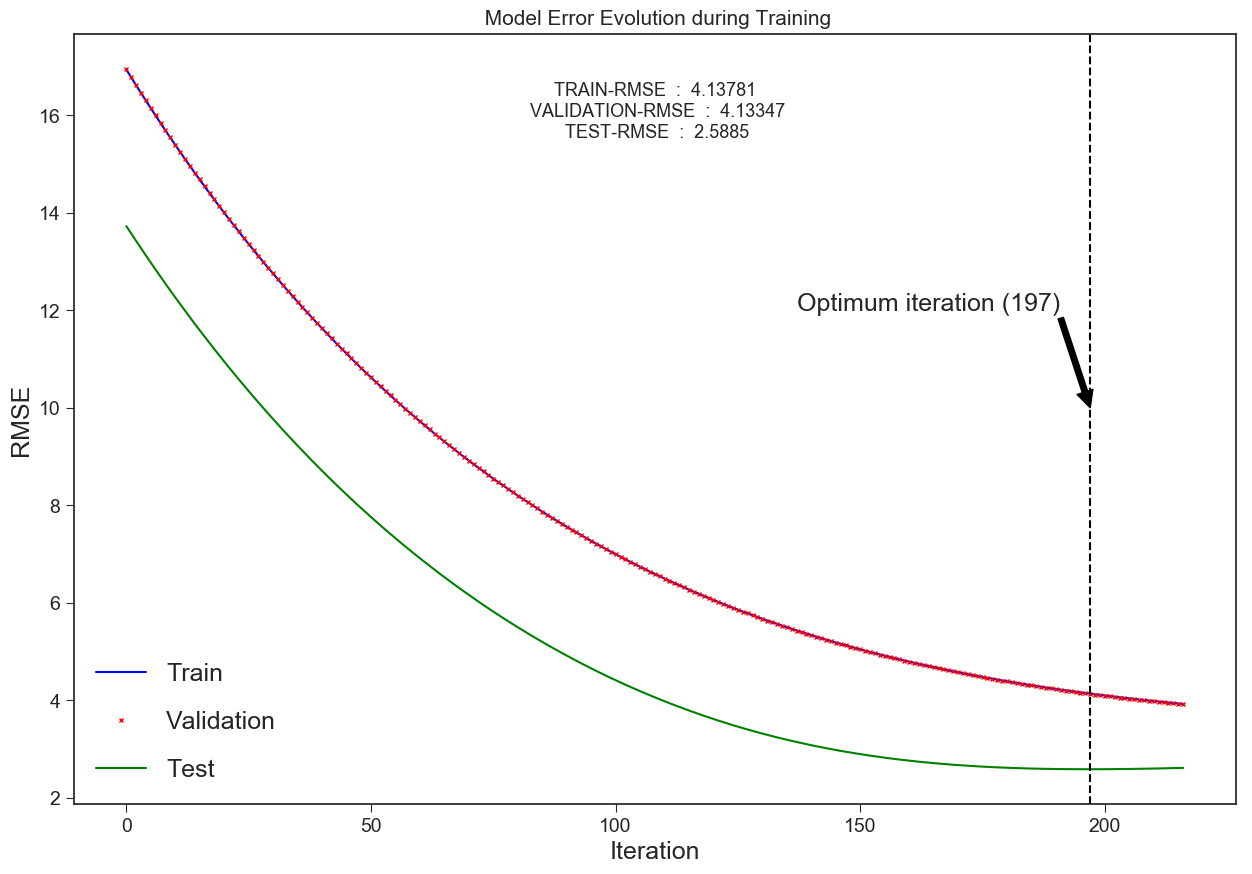

In [1933]:
plot_fit(model_dim_1, train_results=dim_1_evals_results)

In [749]:
model_dim_1.best_iteration

38

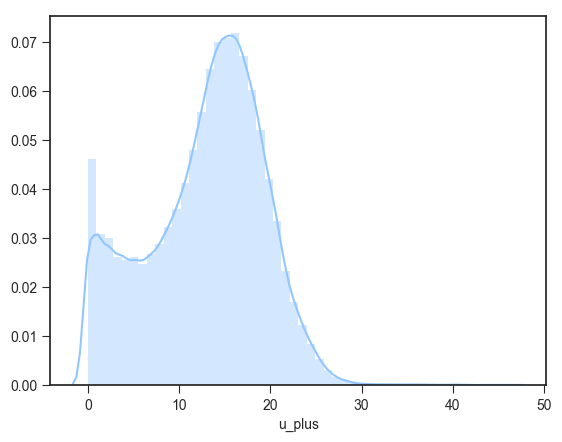

In [1434]:
sns.distplot(preds_test.u_plus)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


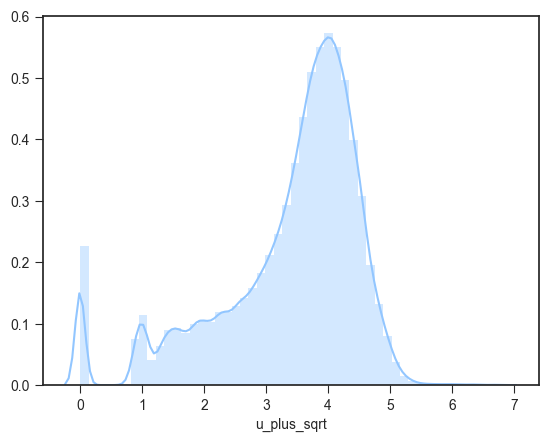

In [1798]:
sns.distplot(preds_test.u_plus_sqrt)

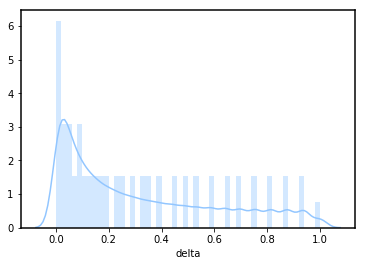

In [1005]:
sns.distplot(preds_test.delta)

In [1103]:
from sklearn.utils import class_weight

In [1463]:
for i in preds[1:]:
    print(f"R2 score : {r2_score(i.u_plus, i.pred_u_plus)}")
    print(f"RMSE score : {np.sqrt(mean_squared_error(i.u_plus, i.pred_u_plus))}")

R2 score : 0.8274963198530858
RMSE score : 2.6443277220912447
R2 score : 0.8427570554439725
RMSE score : 2.524652909995002
R2 score : 0.8336019874972882
RMSE score : 2.5971089149524276


In [1940]:
preds_r2 = [r2_score(i.u_plus, i.pred_u_plus) for i in preds[1:]]

def calc_stats(pred_frame):
    u_plus_avg = pred_frame.groupby("Points:1").mean().u_plus
    pred_u_plus_avg = pred_frame.groupby("Points:1").mean().pred_u_plus
    r2 = r2_score(pred_frame.u_plus, pred_frame.pred_u_plus)
    r2_avg = r2_score(u_plus_avg, pred_u_plus_avg)
    rmse = np.sqrt(mean_squared_error(pred_frame.u_plus, pred_frame.pred_u_plus))
    rmse_avg = np.sqrt(mean_squared_error(u_plus_avg, pred_u_plus_avg))
    return r2, r2_avg, rmse, rmse_avg

In [2109]:
#len([calc_stats(i)  for k in [preds, preds_d1, preds_d2, preds_v1, preds_v2] for i in k[1:]])
m1, m2, m3 = [calc_stats(i) for i in preds[1:]]
m1d1, m2d1, m3d1 = [calc_stats(i) for i in preds_d1[1:]]
m1d2, m2d2, m3d2 = [calc_stats(i) for i in preds_d2[1:]]
m1v1, m2v1, m3v1 = [calc_stats(i) for i in preds_v1[1:]]
m1v2, m2v2, m3v2 = [calc_stats(i) for i in preds_v2[1:]]


In [1970]:
preds_data = {}
preds_d1_data = {}
preds_d2_data = {}
preds_v1_data = {}
preds_v2_data = {}
preds_data['r2'] = [r2_score(i.u_plus, i.pred_u_plus) for i in preds[1:]]
preds_data['mse'] = [np.sqrt(mean_squared_error(i.u_plus, i.pred_u_plus)) for i in preds[1:]]
preds_d1_data['r2'] = [r2_score(i.u_plus, i.pred_u_plus) for i in preds_d1[1:]]
preds_d1_data['mse'] = [np.sqrt(mean_squared_error(i.u_plus, i.pred_u_plus)) for i in preds_d1[1:]]
preds_d2_data['r2'] = [r2_score(i.u_plus, i.pred_u_plus) for i in preds_d2[1:]]
preds_d2_data['mse'] = [np.sqrt(mean_squared_error(i.u_plus, i.pred_u_plus)) for i in preds_d2[1:]]
preds_v1_data['r2'] = [r2_score(i.u_plus, i.pred_u_plus) for i in preds_v1[1:]]
preds_v1_data['mse'] = [np.sqrt(mean_squared_error(i.u_plus, i.pred_u_plus)) for i in preds_v1[1:]]
preds_v2_data['r2'] = [r2_score(i.u_plus, i.pred_u_plus) for i in preds_v2[1:]]
preds_v2_data['mse'] = [np.sqrt(mean_squared_error(i.u_plus, i.pred_u_plus)) for i in preds_v2[1:]]
preds_train_180 = {'r2': [0.31746346119754254, 0.611151772890516, 0.7210724641902415],
 'mse': [5.62579690453209, 4.246304739696979, 3.5963900868271597]}

In [2113]:
vars()['m1']

(0.8243062837116615, 0.9906406098989973, 2.670015117220632, 0.5522918993405719)

In [2180]:
exp_1_frame = pd.DataFrame(index=["model_1","model_2","model3"], 
                         columns=["r2", "r2_avg","mse","mse_avg"])
exp_2_frame = pd.DataFrame(index=["model_1","model_2","model3"], 
                         columns=["r2", "r2_avg","mse","mse_avg"])
exp_d1_frame = pd.DataFrame(index=["model_1","model_2","model3"], 
                         columns=["r2", "r2_avg","mse","mse_avg"])
exp_d2_frame = pd.DataFrame(index=["model_1","model_2","model3"], 
                         columns=["r2", "r2_avg","mse","mse_avg"])
exp_v1_frame = pd.DataFrame(index=["model_1","model_2","model3"], 
                         columns=["r2", "r2_avg","mse","mse_avg"])
exp_v2_frame = pd.DataFrame(index=["model_1","model_2","model3"], 
                         columns=["r2", "r2_avg","mse","mse_avg"])
#exp_1_frame.iloc[0:2] = m1,m2,m3
#exp_1_frame.iloc[1] = m2
#exp_1_frame.iloc[2] = m3
exper =[]

for i in range(0,3):
    exp_1_frame.iloc[i] = vars()[f'm{i+1}']
    exp_d1_frame.iloc[i] = vars()[f'm{i+1}d1']
    exp_d2_frame.iloc[i] = vars()[f'm{i+1}d2']
    exp_v1_frame.iloc[i] = vars()[f'm{i+1}v1']
    exp_v2_frame.iloc[i] = vars()[f'm{i+1}v2']

In [2181]:
exp_2_frame.iloc[0] = (0.31746346119754254, 0.39605952511231524, 5.62579690453209, 4.448067339775489)
exp_2_frame.iloc[1] = (0.611151772890516, 0.8165989175017642, 4.246304739696979, 2.4511801598735277)
exp_2_frame.iloc[2] = (0.7210724641902415,0.9681045344645245,3.5963900868271597,1.0222067820819394)


In [2167]:
def plot_evals(dataframe,title=" "):    
    plt.style.use("seaborn-white")
    fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)
    l1 = ax1.scatter(list(dataframe.index), dataframe.r2,label="Actual Predictions", color="blue")
    l2 = ax1.scatter(list(dataframe.index), dataframe.r2_avg,marker="+", label="Averaged Prediction", color="red")
    ax2.scatter(list(dataframe.index), dataframe.mse, color="blue")
    ax2.scatter(list(dataframe.index), dataframe.mse_avg, marker="+", color="red")
    #ax1.legend(frameon=True)
    ax1.set_ylabel(ylabel= r"$R^2$")
    ax2.set_ylabel("RMSE")
    ax2.set_xticklabels(labels=["XGB 1","XGB 2","XGB 3"],)
    #ax2.legend(frameon=True)
    ax1.grid(which="both")
    ax2.grid()
    fig.legend((l1, l2), ('All Predictions', 'Averaged Predictions'), frameon=True, loc=(0.7,0.89))
    fig.suptitle(title, fontweight="heavy",x=0.5)

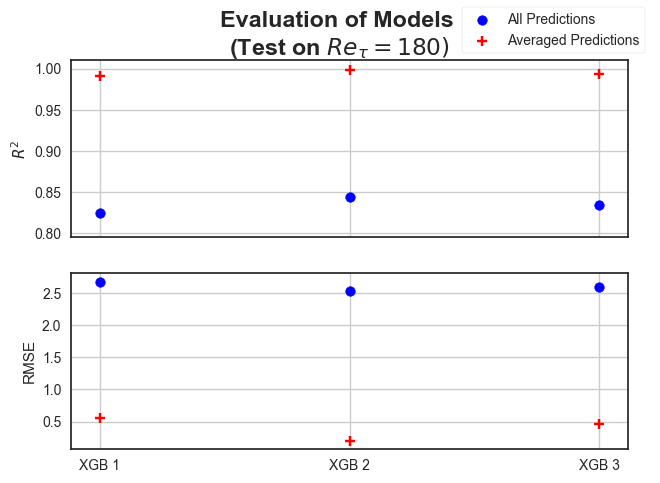

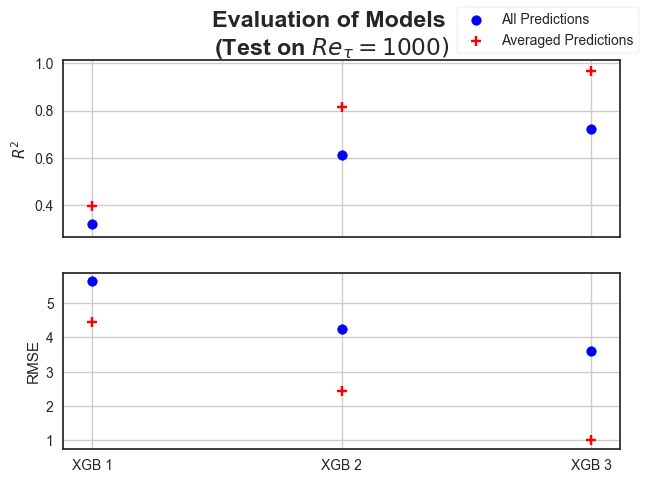

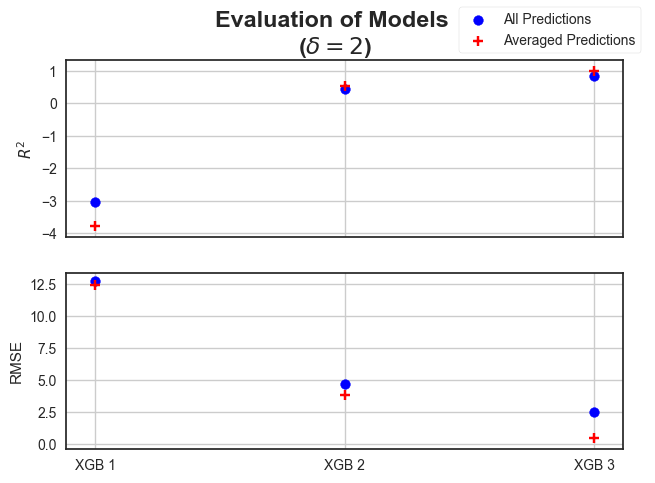

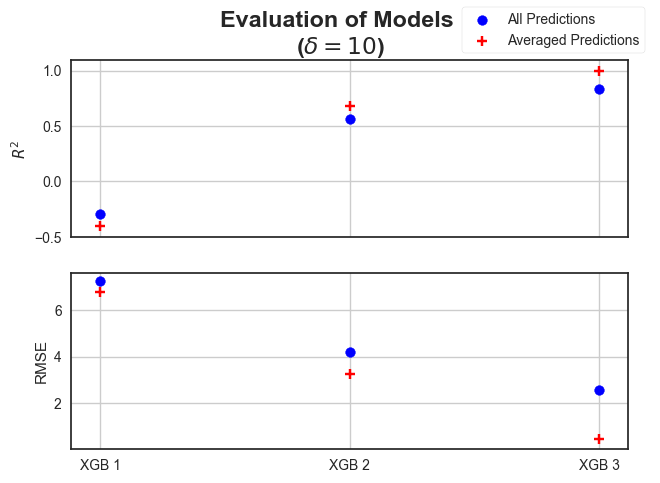

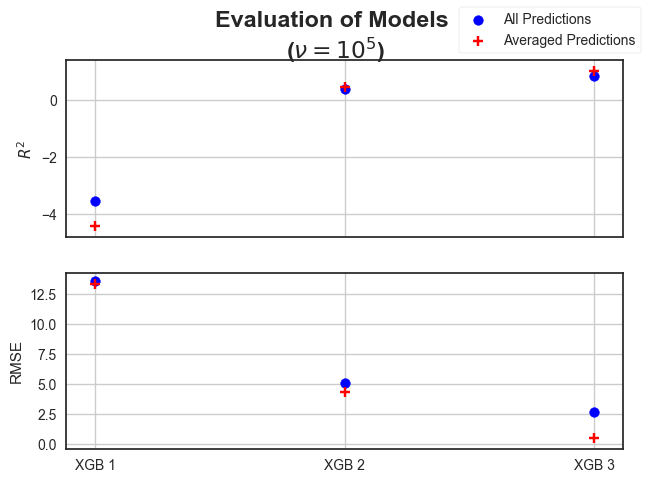

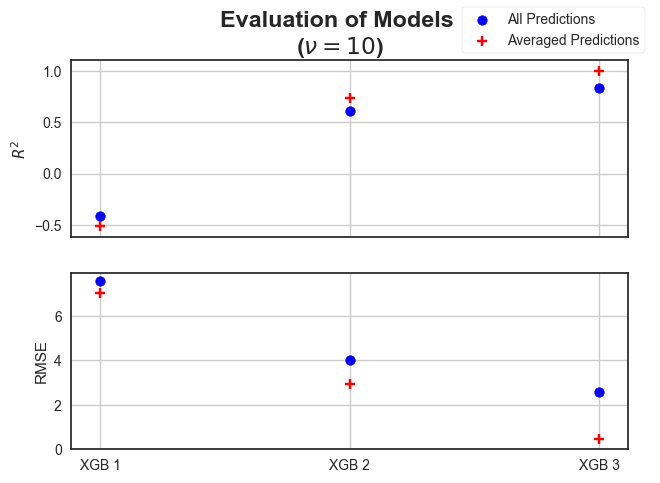

In [2186]:
plot_evals(exp_1_frame, "Evaluation of Models \n" + r"(Test on $Re_{\tau}=180)$")
plot_evals(exp_2_frame, "Evaluation of Models \n" + r"(Test on $Re_{\tau}=1000)$")
plot_evals(exp_d1_frame, "Evaluation of Models \n($\delta=2$)")
plot_evals(exp_d2_frame, "Evaluation of Models \n($\delta=10$)")
plot_evals(exp_v1_frame, "Evaluation of Models \n" +r"($\nu=10^5$)")
plot_evals(exp_v2_frame, "Evaluation of Models \n" + r"($\nu=10$)")

# Model tuning

In [62]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [63]:
def tune_parameter(data, parameter, param_range, save_plot=False, randomized=False, save_path=None, n_iter = None, n_splits=5,estimator=None):
    """
    Function to tune a parameter using either gridsearch or randomized search with possibility of cross validation.
    Input:
        - data = dataset to be used tuning, usually the training dataset.
        - parameter = string of parameter to be tuned. (works with XGBoost for now)
        - param_range = parameter search space
        - estimator = model to be tuned if existing already, if not a new default XGBRegressor model wil be created
    """

    train_x, train_y = X_Y_split_2(data)
    param_grid = {parameter : list(param_range)}
    kfold = KFold(n_splits=n_splits, random_state=7)
    if not estimator:
        estimator = xgb.XGBRegressor(objective="reg:squarederror", )
    if randomized:
        assert n_iter != None, "Missing number of iterations"
        param_search = RandomizedSearchCV(estimator,param_grid,n_iter=n_iter,scoring="neg_mean_squared_error",cv=kfold)
    else:
        param_search = GridSearchCV(estimator, param_grid, verbose=0, cv=kfold, scoring="neg_mean_squared_error")
    grid_result = param_search.fit(train_x, train_y, verbose=0)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
        #for mean, sdev, param in zip(means, stds, params):
        #print("%f (%f) with: %r" % (mean, stdev, param))

    if randomized:
        param_range = [list(i.values())[0] for i in params]


    fig, ax = plt.subplots()
    ax.errorbar(param_range,-1*means, yerr=stds)
    ax.set_title("XGBoost %s vs RMSE" %parameter)
    ax.set_xlabel('%s' %parameter)
    ax.set_ylabel('RMSE')
    if save_plot:
        if save_path:
            fig.savefig("%s/%s.png" %(save_path,parameter))
        else:
            fig.savefig("%s.png" %parameter)
    return grid_result

In [66]:
parameters = {
    'learning_rate': np.linspace(0.01,0.3,10),
    'max_depth' : np.arange(2,5,1),
    'subsample' : np.arange(0.6,1.0,0.1),
    'colsample_by_tree' : np.arange(0.4,1.0,0.2),
    'reg_alpha' : np.linspace(0,100,num=10),
    'reg_lambda' : np.linspace(0,100, num = 10),
    'gamma' : np.linspace(0,100, num = 10),
}
default_params = dict(max_depth=7,
              colsample_bytree=1,
              subsample = 1,
              learning_rate=0.08,
              objective="reg:squarederror",
              n_estimators =300,
              silent=0,
              reg_alpha=0,
              reg_lambda=10,
              booster='gbtree')


In [67]:
model_test = XGBoost_Model(default_params, clean_data )

NameError: name 'clean_data' is not defined